In [111]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np

import sys
sys.path.append("..")

from channeling_lib import AWS_file_loader, load_path


In [112]:
#get data
path = load_path() + 'RawData/AWS/'

raw_layla_calibdata = path + 'Layla/Calibration/CR1000_Layla_Res_data_1_min_20240910_20250125_2025_01_25_15_51_14.dat'
raw_rosanna_calibdata =  path + 'Rosanna/Calibration/CR200_Rosanna_Res_data_1_min_20240910_20250125_2025_01_25_14_36_19.dat'
raw_mrsrobinson_calibdata =  path + 'Mrs Robinson/Calibration/CR200_MrsRobinson_Res_data_1_min_20240910_20250125_2025_01_25_15_13_29.dat'
raw_bettedavis_calibdata =  path + 'Bette Davis/Calibration/CR200_BetteDavis_Res_data_1_min_20240910_20250125_2025_01_25_15_31_31.dat'
raw_tomjoad_calibdata =  path + 'Tom Joad/Calibration/CR1000_TomJoad_Res_data_1_min_20240910_20250125_2025_01_25_15_56_26.dat'

print(raw_layla_calibdata)

../Data/RawData/AWS/Layla/Calibration/CR1000_Layla_Res_data_1_min_20240910_20250125_2025_01_25_15_51_14.dat


In [113]:
df_layla = AWS_file_loader(raw_layla_calibdata) 
#print(df_layla.head())

df_rosanna = AWS_file_loader(raw_rosanna_calibdata)
#print(df_rosanna.head()) 

df_mrsrobinson = AWS_file_loader(raw_mrsrobinson_calibdata)
#print(df_mrsrobinson.head()) 

df_bettedavis = AWS_file_loader(raw_bettedavis_calibdata)
print(df_bettedavis.head()) 

df_tomjoad = AWS_file_loader(raw_tomjoad_calibdata)
#(df_tomjoad.head()) 

c:\Users\Paula\anaconda3\envs\Boundary_Layer\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
c:\Users\Paula\anaconda3\envs\Boundary_Layer\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
c:\Users\Paula\anaconda3\envs\Boundary_Layer\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_object

                      RECORD     BattV  temperature  rel_humidity  wind_speed  \
TIMESTAMP                                                                       
2024-09-09 14:10:00  22912.0  12.60753     2.369150      58.67678         0.0   
2024-09-09 14:11:00  22913.0  12.60501     2.377545      58.85535         0.0   
2024-09-09 14:12:00  22914.0  12.60837     2.379834      58.59741         0.0   
2024-09-09 14:13:00  22915.0  12.60333     2.376146      58.83703         0.0   
2024-09-09 14:14:00  22916.0  12.60166     2.377545      58.22653         0.0   

                     gust_speed  wind_direction  
TIMESTAMP                                        
2024-09-09 14:10:00         0.0             0.0  
2024-09-09 14:11:00         0.0             0.0  
2024-09-09 14:12:00         0.0             0.0  
2024-09-09 14:13:00         0.0             0.0  
2024-09-09 14:14:00         0.0             0.0  


c:\Users\Paula\anaconda3\envs\Boundary_Layer\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


In [114]:
# common days based on index time
common_days = df_layla.index  # all the same like laylas dates

# filter the others
df_rosanna_filtered = df_rosanna[df_rosanna.index.isin(common_days)]
df_mrsrobinson_filtered = df_mrsrobinson[df_mrsrobinson.index.isin(common_days)]
df_bettedavis_filtered = df_bettedavis[df_bettedavis.index.isin(common_days)]
df_tomjoad_filtered = df_tomjoad[df_tomjoad.index.isin(common_days)]

# # check
# print(df_layla_filtered.head())
print(df_bettedavis_filtered.head())


                      RECORD     BattV  temperature  rel_humidity  wind_speed  \
TIMESTAMP                                                                       
2025-01-22 16:27:00  35470.0  12.93156     21.03499      31.43012         0.0   
2025-01-22 16:28:00  35471.0  12.91980     20.98778      31.16760         0.0   
2025-01-22 16:29:00  35472.0  12.92904     20.96845      31.72926         0.0   
2025-01-22 16:30:00  35473.0  12.92232     20.96514      31.02261         0.0   
2025-01-22 16:31:00  35474.0  12.92232     20.98269      30.67615         0.0   

                     gust_speed  wind_direction  
TIMESTAMP                                        
2025-01-22 16:27:00         0.0           315.0  
2025-01-22 16:28:00         0.0           315.0  
2025-01-22 16:29:00         0.0           315.0  
2025-01-22 16:30:00         0.0           315.0  
2025-01-22 16:31:00         0.0           315.0  


In [115]:
# #filter
# common_days = df_layla.iloc[:, 0]  # laylas days

# # filtered data
# df_layla_filtered = df_layla[df_layla.iloc[:, 0].isin(common_days)]
# df_rosanna_filtered = df_rosanna[df_rosanna.iloc[:, 0].isin(common_days)]
# df_mrsrobinson_filtered = df_mrsrobinson[df_mrsrobinson.iloc[:, 0].isin(common_days)]
# df_bettedavis_filtered = df_bettedavis[df_bettedavis.iloc[:, 0].isin(common_days)]
# df_tomjoad_filtered = df_tomjoad[df_tomjoad.iloc[:, 0].isin(common_days)]

# # print
# print(df_rosanna_filtered.head())
# print(df_layla_filtered.head())
# # print(df_bettedavis_filtered.head())
# # print(df_tomjoad_filtered.head())
# #print(df_tomjoad_filtered.to_string())  

WIND

time series

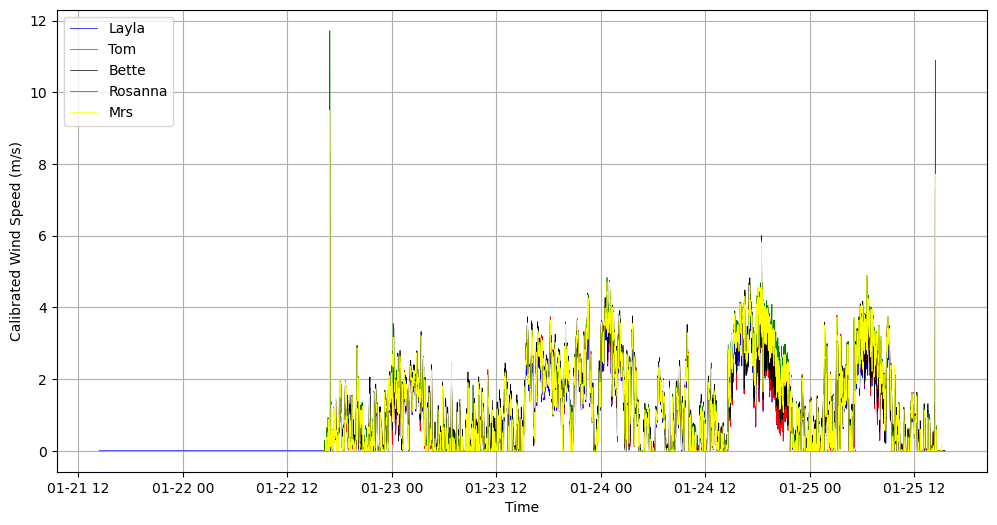

,RECORD,BattV,temperature,rel_humidity,wind_speed,gust_speed,wind_direction
TIMESTAMP,,,,,,,
2025-01-22 16:30:00,16931.0,12.87,20.95,39.36,0.0,0.0,31.59
2025-01-22 16:31:00,16932.0,12.86,20.95,38.81,0.0,0.0,28.52
2025-01-22 16:32:00,16933.0,12.85,20.95,39.79,0.0,0.0,179.60
2025-01-22 16:33:00,16934.0,12.84,20.95,39.23,0.0,0.0,183.90
2025-01-22 16:34:00,16935.0,12.86,20.94,39.00,0.0,0.0,185.10


In [116]:
# Plot für Windgeschwindigkeit
plt.figure(figsize=(12, 6))

# Windgeschwindigkeit für jede Station mit der Zeit auf der x-Achse
plt.plot(df_layla.index, df_layla['wind_speed'], label='Layla', color='blue', linewidth=0.5)
plt.plot(df_tomjoad_filtered.index, df_tomjoad_filtered['wind_speed'], label='Tom', color='red', linewidth=0.5)
plt.plot(df_bettedavis_filtered.index, df_bettedavis_filtered['wind_speed'], label='Bette', color='black', linewidth=0.5)
plt.plot(df_rosanna_filtered.index, df_rosanna_filtered['wind_speed'], label='Rosanna', color='green', linewidth=0.5)
plt.plot(df_mrsrobinson_filtered.index, df_mrsrobinson_filtered['wind_speed'], label='Mrs', color='yellow', linewidth=0.5)

# Diagramm formatieren
plt.xlabel('Time')
plt.ylabel('Calibrated Wind Speed (m/s)')
plt.legend()
plt.grid(True)

# Diagramm anzeigen
#df_layla_filtered.index

plt.show()

df_tomjoad_filtered.head()


In [117]:
# # variables
# time = 'TIMESTAMP'
# wind = 'wind_speed'
# pressure = 'air_pressure'
# temperature = 'temperature'
# rel_humidity = 'rel_humidity'
# wind_direction = 'wind_direction'
# gust_speed = 'gust_speed'

cut out weird values (zero/ nan and peaks (too high)
)

Layla Data after filtering:
                      RECORD  BattV  temperature  rel_humidity  wind_speed  \
TIMESTAMP                                                                    
2025-01-22 17:08:00  12893.0  12.39       -5.946         60.65       0.366   
2025-01-22 17:09:00  12894.0  12.38       -6.016         62.51       0.047   
2025-01-22 17:10:00  12895.0  12.38       -6.137         63.18       0.029   
2025-01-22 17:11:00  12896.0  12.38       -6.230         64.20       0.399   
2025-01-22 17:12:00  12897.0  12.38       -6.350         64.97       0.565   

                     gust_speed  wind_direction  air_pressure  \
TIMESTAMP                                                       
2025-01-22 17:08:00       0.549           280.6      994.5526   
2025-01-22 17:09:00       0.490           246.0      994.5626   
2025-01-22 17:10:00       0.235           245.5      994.5707   
2025-01-22 17:11:00       0.804           240.4      994.5823   
2025-01-22 17:12:00       1.117    

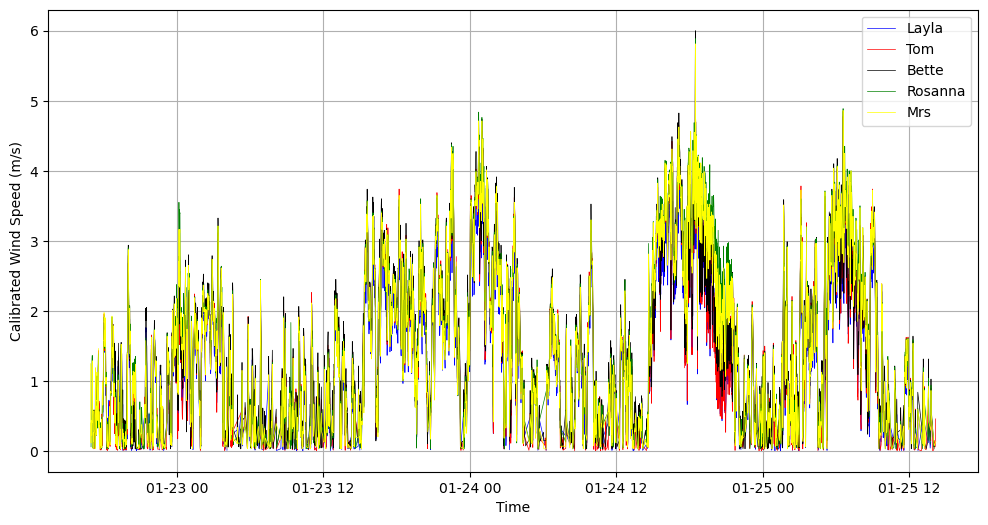

In [118]:
# Entfernen von Nullwerten und den ersten drei sowie letzten zwei Werten
df_layla_filtered_wind = df_layla[df_layla['wind_speed'] != 0]
df_rosanna_filtered_wind = df_rosanna_filtered[df_rosanna_filtered['wind_speed'] != 0]
df_mrsrobinson_filtered_wind = df_mrsrobinson_filtered[df_mrsrobinson_filtered['wind_speed'] != 0]
df_bettedavis_filtered_wind = df_bettedavis_filtered[df_bettedavis_filtered['wind_speed'] != 0]
df_tomjoad_filtered_wind = df_tomjoad_filtered[df_tomjoad_filtered['wind_speed'] != 0]

#cut out manualy (peaks - weird)
df_layla_filtered_wind = df_layla_filtered_wind.iloc[15:-10]
df_rosanna_filtered_wind = df_rosanna_filtered_wind.iloc[15:-10]
df_mrsrobinson_filtered_wind = df_mrsrobinson_filtered_wind.iloc[15:-10]
df_bettedavis_filtered_wind = df_bettedavis_filtered_wind.iloc[115:-10]
df_tomjoad_filtered_wind = df_tomjoad_filtered_wind.iloc[15:-10]

# Überprüfen, ob Nullwerte und die ersten/letzten Werte entfernt wurden
print("Layla Data after filtering:")
print(df_layla_filtered_wind.head())
print("Rosanna Data after filtering:")
print(df_rosanna_filtered_wind.head())
print("Mrs Robinson Data after filtering:")
print(df_mrsrobinson_filtered_wind.head())
print("Bette Davis Data after filtering:")
print(df_bettedavis_filtered_wind.head())
print("Tom Joad Data after filtering:")
print(df_tomjoad_filtered_wind.head())

# Plot für Windgeschwindigkeit nach dem Entfernen der Nullwerte und der ersten/letzten Werte
plt.figure(figsize=(12, 6))

# Windgeschwindigkeit für jede Station mit der Zeit auf der x-Achse
plt.plot(df_layla_filtered_wind.index, df_layla_filtered_wind['wind_speed'], label='Layla', color='blue', linewidth=0.5)
plt.plot(df_tomjoad_filtered_wind.index, df_tomjoad_filtered_wind['wind_speed'], label='Tom', color='red', linewidth=0.5)
plt.plot(df_bettedavis_filtered_wind.index, df_bettedavis_filtered_wind['wind_speed'], label='Bette', color='black', linewidth=0.5)
plt.plot(df_rosanna_filtered_wind.index, df_rosanna_filtered_wind['wind_speed'], label='Rosanna', color='green', linewidth=0.5)
plt.plot(df_mrsrobinson_filtered_wind.index, df_mrsrobinson_filtered_wind['wind_speed'], label='Mrs', color='yellow', linewidth=0.5)

# Diagramm formatieren
plt.xlabel('Time')
plt.ylabel('Calibrated Wind Speed (m/s)')
plt.legend()
plt.grid(True)

# Diagramm anzeigen
plt.show()


In [119]:
# def filter_wind_data(df):
#     df[time] = pd.to_datetime(df[time])  # time as 'datetime'
#     df_filtered = df[df[wind] > 0]  # zero values --> cut out

#     # cut out data that does not fit the curve at the end and beginning
#     if len(df_filtered) > 2:
#         df_filtered = df_filtered.iloc[3:-2]
    
#     return df_filtered
# # filter layla
# df_layla_filtered = filter_wind_data(df_layla)

# # only keep data from laylas time span (without 2024) for all stations
# valid_times = df_layla_filtered[time]

# df_rosanna_filtered = filter_wind_data(df_rosanna)
# df_rosanna_filtered = df_rosanna_filtered[df_rosanna_filtered[time].isin(valid_times)]

# df_mrsrobinson_filtered = filter_wind_data(df_mrsrobinson)
# df_mrsrobinson_filtered = df_mrsrobinson_filtered[df_mrsrobinson_filtered[time].isin(valid_times)]

# df_bettedavis_filtered = filter_wind_data(df_bettedavis)
# df_bettedavis_filtered = df_bettedavis_filtered[df_bettedavis_filtered[time].isin(valid_times)]

# df_tomjoad_filtered = filter_wind_data(df_tomjoad)
# df_tomjoad_filtered = df_tomjoad_filtered[df_tomjoad_filtered[time].isin(valid_times)]
# #df_tomjoad_filtered

In [120]:
# # DataFrames 
# df_avg = df_layla[[time, wind]].rename(columns={wind: 'layla_wind'})

# df_avg = df_avg.merge(df_rosanna_filtered[[time, wind]].rename(columns={wind: 'rosanna_wind'}), on=time, how='outer')
# df_avg = df_avg.merge(df_mrsrobinson_filtered[[time, wind]].rename(columns={wind: 'mrsrobinson_wind'}), on=time, how='outer')
# df_avg = df_avg.merge(df_bettedavis_filtered[[time, wind]].rename(columns={wind: 'bettedavis_wind'}), on=time, how='outer')
# df_avg = df_avg.merge(df_tomjoad_filtered[[time, wind]].rename(columns={wind: 'tomjoad_wind'}), on=time, how='outer')

# #  mean curve over all data
# df_avg['wind_avg'] = df_avg.iloc[:, 1:].mean(axis=1, skipna=True)

# # average of windspeed
# df_avg = df_avg[[time, 'wind_avg']]

# print(df_avg.head())

averaging

                     wind_avg
TIMESTAMP                    
2025-01-22 16:55:00  1.245833
2025-01-22 16:56:00  0.708333
2025-01-22 16:57:00  0.179167
2025-01-22 16:58:00  0.085417
2025-01-22 16:59:00  0.397917


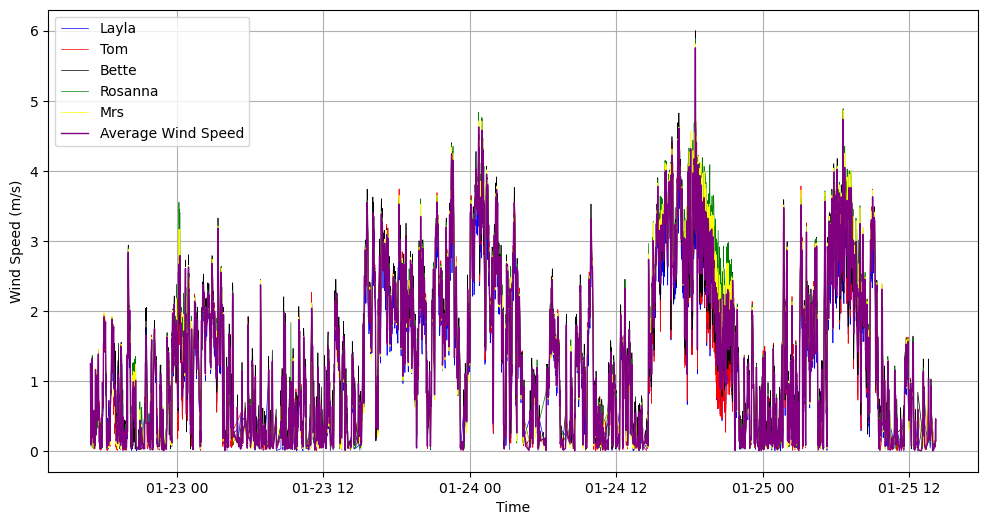

In [121]:
# DataFrames mit den Zeitstempeln (Index) und den Windgeschwindigkeiten
df_avg = df_layla_filtered_wind[['wind_speed']].rename(columns={'wind_speed': 'layla_wind'})

# Merge mit den anderen Stationen unter Verwendung des Index als Zeitstempel
df_avg = df_avg.merge(df_rosanna_filtered_wind[['wind_speed']].rename(columns={'wind_speed': 'rosanna_wind'}), left_index=True, right_index=True, how='outer')
df_avg = df_avg.merge(df_mrsrobinson_filtered_wind[['wind_speed']].rename(columns={'wind_speed': 'mrsrobinson_wind'}), left_index=True, right_index=True, how='outer')
df_avg = df_avg.merge(df_bettedavis_filtered_wind[['wind_speed']].rename(columns={'wind_speed': 'bettedavis_wind'}), left_index=True, right_index=True, how='outer')
df_avg = df_avg.merge(df_tomjoad_filtered_wind[['wind_speed']].rename(columns={'wind_speed': 'tomjoad_wind'}), left_index=True, right_index=True, how='outer')

# Mittelwert der Windgeschwindigkeiten berechnen
df_avg['wind_avg'] = df_avg[['layla_wind', 'rosanna_wind', 'mrsrobinson_wind', 'bettedavis_wind', 'tomjoad_wind']].mean(axis=1, skipna=True)

# Nur die Spalten mit Zeit (Index) und dem Mittelwert behalten
df_avg = df_avg[['wind_avg']]

# Ausgabe der ersten Zeilen der berechneten Mittelwerte
print(df_avg.head())

# Plot der Windgeschwindigkeiten für jede Station und den Mittelwert
plt.figure(figsize=(12, 6))

# Windgeschwindigkeit für jede Station mit der Zeit auf der x-Achse
plt.plot(df_layla_filtered_wind.index, df_layla_filtered_wind['wind_speed'], label='Layla', color='blue', linewidth=0.5)
plt.plot(df_tomjoad_filtered_wind.index, df_tomjoad_filtered_wind['wind_speed'], label='Tom', color='red', linewidth=0.5)
plt.plot(df_bettedavis_filtered_wind.index, df_bettedavis_filtered_wind['wind_speed'], label='Bette', color='black', linewidth=0.5)
plt.plot(df_rosanna_filtered_wind.index, df_rosanna_filtered_wind['wind_speed'], label='Rosanna', color='green', linewidth=0.5)
plt.plot(df_mrsrobinson_filtered_wind.index, df_mrsrobinson_filtered_wind['wind_speed'], label='Mrs', color='yellow', linewidth=0.5)

# Mittelwert plotten
plt.plot(df_avg.index, df_avg['wind_avg'], label='Average Wind Speed', color='purple', linewidth=1)

# Diagramm formatieren
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
plt.legend()
plt.grid(True)

# Diagramm anzeigen
plt.show()


calibration wind

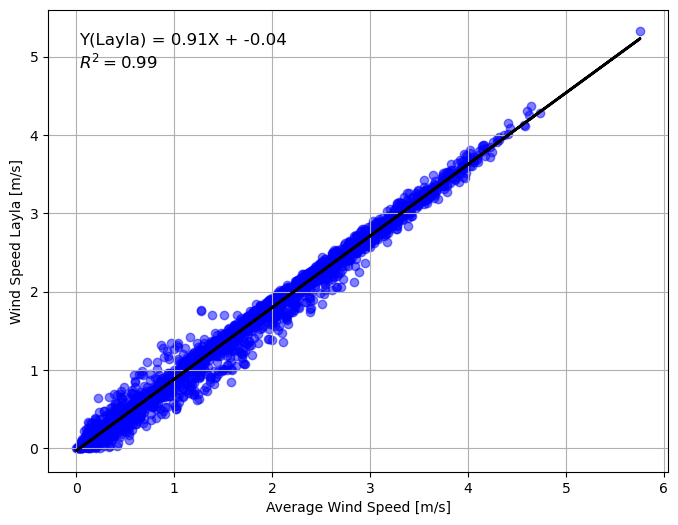

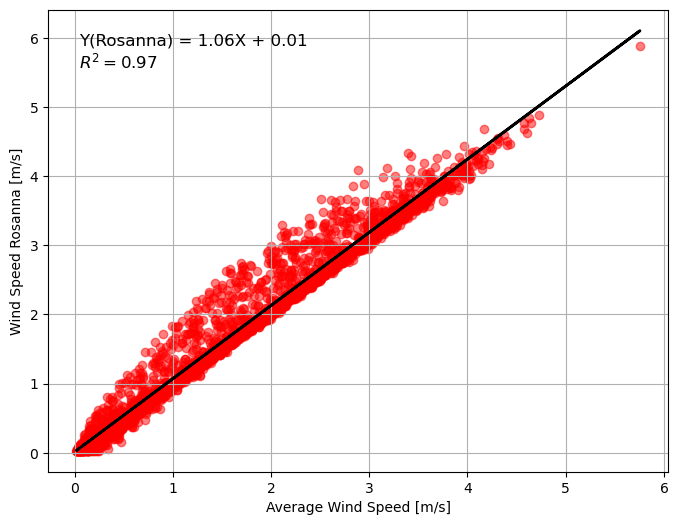

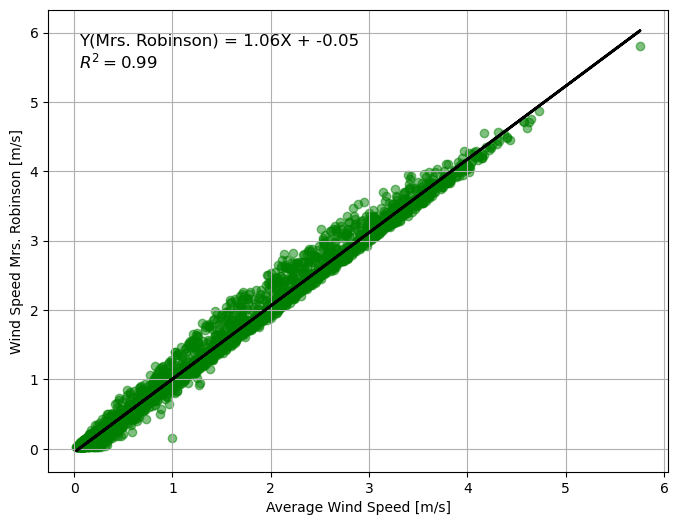

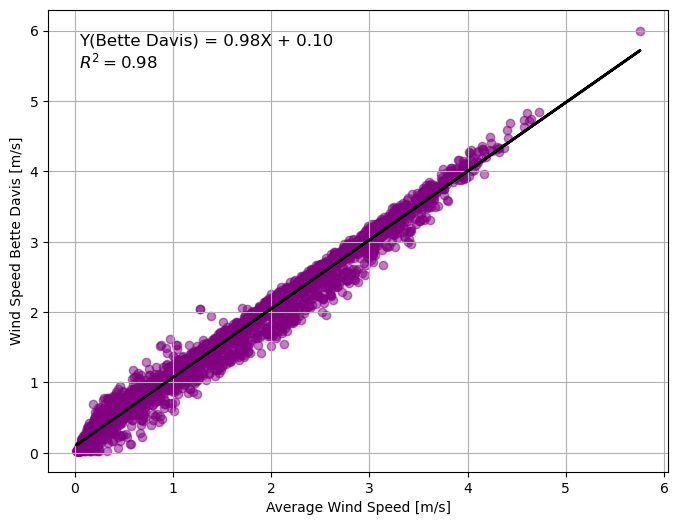

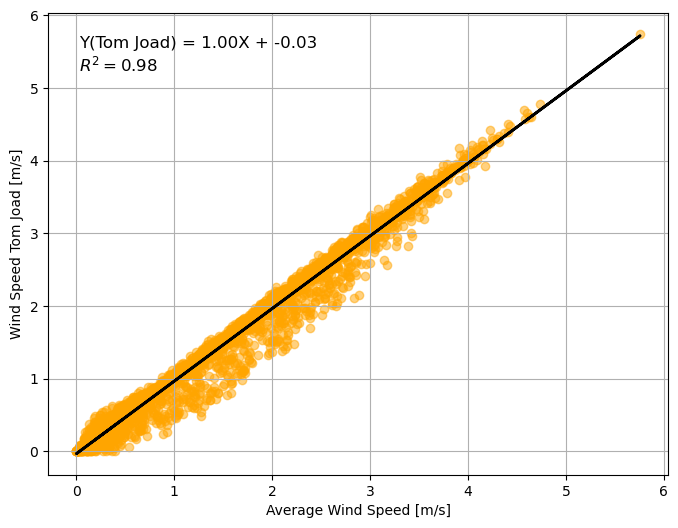

In [122]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

#----------------------------------------------------------------------------------------------------
# Layla Wind
df_scatter_layla = df_layla_filtered_wind[['wind_speed']].merge(df_avg[['wind_avg']], left_index=True, right_index=True, how='inner')

slope, intercept, r_value, p_value, std_err = linregress(df_scatter_layla['wind_avg'], df_scatter_layla['wind_speed'])
regression_line = slope * df_scatter_layla['wind_avg'] + intercept

plt.figure(figsize=(8, 6))
plt.scatter(df_scatter_layla['wind_avg'], df_scatter_layla['wind_speed'], color='blue', alpha=0.5)
plt.plot(df_scatter_layla['wind_avg'], regression_line, color='black', linewidth=2)

equation_text = f'Y(Layla) = {slope:.2f}X + {intercept:.2f}\n$R^2 = {r_value**2:.2f}$'

plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color='black')
plt.xlabel('Average Wind Speed [m/s]')
plt.ylabel('Wind Speed Layla [m/s]')
plt.grid(True)
plt.show()

#----------------------------------------------------------------------------------------------------
# Rosanna Wind
df_scatter_rosanna = df_rosanna_filtered_wind[['wind_speed']].merge(df_avg[['wind_avg']], left_index=True, right_index=True, how='inner')

slope, intercept, r_value, p_value, std_err = linregress(df_scatter_rosanna['wind_avg'], df_scatter_rosanna['wind_speed'])
regression_line = slope * df_scatter_rosanna['wind_avg'] + intercept

plt.figure(figsize=(8, 6))
plt.scatter(df_scatter_rosanna['wind_avg'], df_scatter_rosanna['wind_speed'], color='red', alpha=0.5)
plt.plot(df_scatter_rosanna['wind_avg'], regression_line, color='black', linewidth=2)

equation_text = f'Y(Rosanna) = {slope:.2f}X + {intercept:.2f}\n$R^2 = {r_value**2:.2f}$'

plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color='black')
plt.xlabel('Average Wind Speed [m/s]')
plt.ylabel('Wind Speed Rosanna [m/s]')
plt.grid(True)
plt.show()

#----------------------------------------------------------------------------------------------------
# Mrs. Robinson Wind
df_scatter_mrsrobinson = df_mrsrobinson_filtered_wind[['wind_speed']].merge(df_avg[['wind_avg']], left_index=True, right_index=True, how='inner')

slope, intercept, r_value, p_value, std_err = linregress(df_scatter_mrsrobinson['wind_avg'], df_scatter_mrsrobinson['wind_speed'])
regression_line = slope * df_scatter_mrsrobinson['wind_avg'] + intercept

plt.figure(figsize=(8, 6))
plt.scatter(df_scatter_mrsrobinson['wind_avg'], df_scatter_mrsrobinson['wind_speed'], color='green', alpha=0.5)
plt.plot(df_scatter_mrsrobinson['wind_avg'], regression_line, color='black', linewidth=2)

equation_text = f'Y(Mrs. Robinson) = {slope:.2f}X + {intercept:.2f}\n$R^2 = {r_value**2:.2f}$'

plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color='black')
plt.xlabel('Average Wind Speed [m/s]')
plt.ylabel('Wind Speed Mrs. Robinson [m/s]')
plt.grid(True)
plt.show()

#----------------------------------------------------------------------------------------------------
# Bette Davis Wind
df_scatter_bettedavis = df_bettedavis_filtered_wind[['wind_speed']].merge(df_avg[['wind_avg']], left_index=True, right_index=True, how='inner')

slope, intercept, r_value, p_value, std_err = linregress(df_scatter_bettedavis['wind_avg'], df_scatter_bettedavis['wind_speed'])
regression_line = slope * df_scatter_bettedavis['wind_avg'] + intercept

plt.figure(figsize=(8, 6))
plt.scatter(df_scatter_bettedavis['wind_avg'], df_scatter_bettedavis['wind_speed'], color='purple', alpha=0.5)
plt.plot(df_scatter_bettedavis['wind_avg'], regression_line, color='black', linewidth=2)

equation_text = f'Y(Bette Davis) = {slope:.2f}X + {intercept:.2f}\n$R^2 = {r_value**2:.2f}$'

plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color='black')
plt.xlabel('Average Wind Speed [m/s]')
plt.ylabel('Wind Speed Bette Davis [m/s]')
plt.grid(True)
plt.show()

#----------------------------------------------------------------------------------------------------
# Tom Joad Wind
df_scatter_tomjoad = df_tomjoad_filtered_wind[['wind_speed']].merge(df_avg[['wind_avg']], left_index=True, right_index=True, how='inner')

slope, intercept, r_value, p_value, std_err = linregress(df_scatter_tomjoad['wind_avg'], df_scatter_tomjoad['wind_speed'])
regression_line = slope * df_scatter_tomjoad['wind_avg'] + intercept

plt.figure(figsize=(8, 6))
plt.scatter(df_scatter_tomjoad['wind_avg'], df_scatter_tomjoad['wind_speed'], color='orange', alpha=0.5)
plt.plot(df_scatter_tomjoad['wind_avg'], regression_line, color='black', linewidth=2)

equation_text = f'Y(Tom Joad) = {slope:.2f}X + {intercept:.2f}\n$R^2 = {r_value**2:.2f}$'

plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color='black')
plt.xlabel('Average Wind Speed [m/s]')
plt.ylabel('Wind Speed Tom Joad [m/s]')
plt.grid(True)
plt.show()


PRESSURE

time series

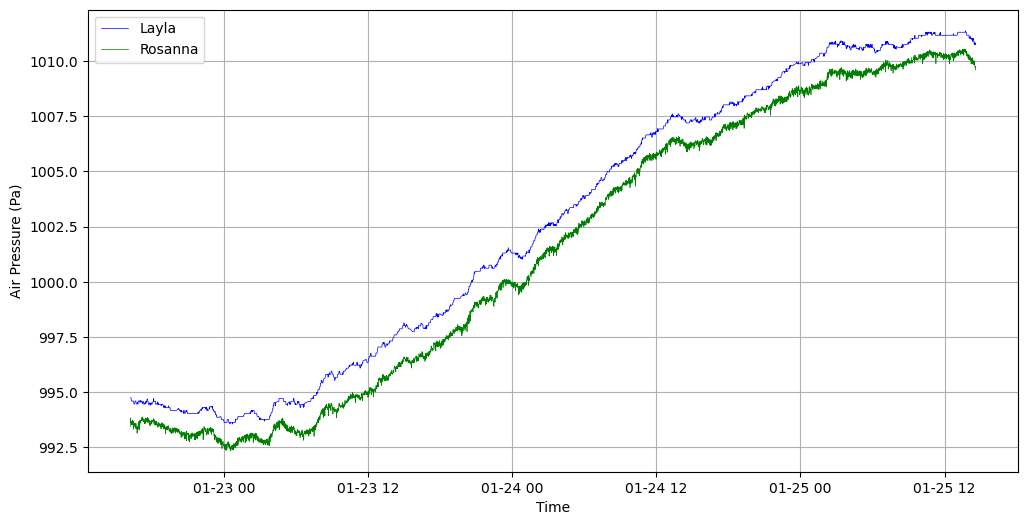

In [123]:
# Entfernen von NaN-Werten in den relevanten Spalten für die jeweilige Station
df_layla_filtered = df_layla.dropna(subset=['air_pressure'])
df_rosanna_filtered = df_rosanna_filtered.dropna(subset=['air_pressure'])

# Gemeinsamen Zeitstempel für beide DataFrames finden
common_index = df_layla_filtered.index.intersection(df_rosanna_filtered.index)

# DataFrames auf den gemeinsamen Index zuschneiden
df_layla_filtered = df_layla_filtered.loc[common_index]
df_rosanna_filtered = df_rosanna_filtered.loc[common_index]

# Plot für Air Pressure
plt.figure(figsize=(12, 6))

# Air Pressure für jede Station mit der Zeit auf der x-Achse
plt.plot(df_layla_filtered.index, df_layla_filtered['air_pressure'], label='Layla', color='blue', linewidth=0.5)
plt.plot(df_rosanna_filtered.index, df_rosanna_filtered['air_pressure'], label='Rosanna', color='green', linewidth=0.5)

# Diagramm formatieren
plt.xlabel('Time')
plt.ylabel('Air Pressure (Pa)')
plt.legend()
plt.grid(True)

# Diagramm anzeigen
plt.show()


averaging

                     pressure_avg
TIMESTAMP                        
2025-01-22 16:13:00     994.09390
2025-01-22 16:14:00     994.28930
2025-01-22 16:15:00     994.19620
2025-01-22 16:16:00     994.18545
2025-01-22 16:17:00     994.20380


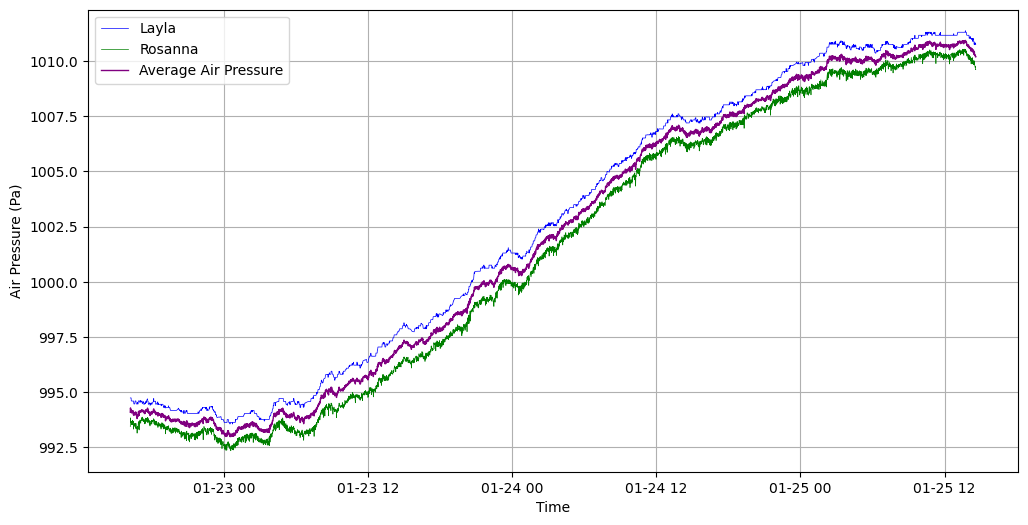

In [124]:
import matplotlib.pyplot as plt

# DataFrames mit den Zeitstempeln (Index) und den Luftdrücken
df_avg_pressure = df_layla_filtered[['air_pressure']].rename(columns={'air_pressure': 'layla_pressure'})

# Merge mit den anderen Stationen unter Verwendung des Index als Zeitstempel
df_avg_pressure = df_avg_pressure.merge(df_rosanna_filtered[['air_pressure']].rename(columns={'air_pressure': 'rosanna_pressure'}), left_index=True, right_index=True, how='outer')

# Mittelwert der Luftdrücke berechnen
df_avg_pressure['pressure_avg'] = df_avg_pressure[['layla_pressure', 'rosanna_pressure']].mean(axis=1, skipna=True)

# Nur die Spalten mit Zeit (Index) und dem Mittelwert behalten
df_avg_pressure = df_avg_pressure[['pressure_avg']]

# Ausgabe der ersten Zeilen der berechneten Mittelwerte
print(df_avg_pressure.head())

# Plot der Luftdrücke für jede Station und den Mittelwert
plt.figure(figsize=(12, 6))

# Luftdruck für jede Station mit der Zeit auf der x-Achse
plt.plot(df_layla_filtered.index, df_layla_filtered['air_pressure'], label='Layla', color='blue', linewidth=0.5)
plt.plot(df_rosanna_filtered.index, df_rosanna_filtered['air_pressure'], label='Rosanna', color='green', linewidth=0.5)

# Mittelwert plotten
plt.plot(df_avg_pressure.index, df_avg_pressure['pressure_avg'], label='Average Air Pressure', color='purple', linewidth=1)

# Diagramm formatieren
plt.xlabel('Time')
plt.ylabel('Air Pressure (Pa)')
plt.legend()
plt.grid(True)

# Diagramm anzeigen
plt.show()


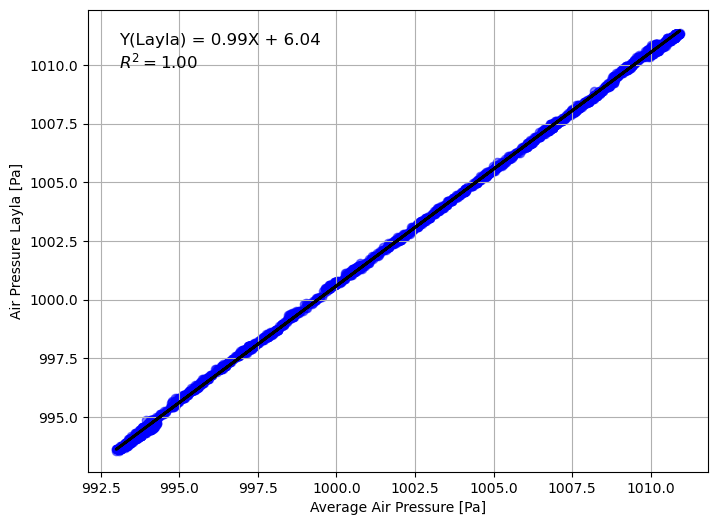

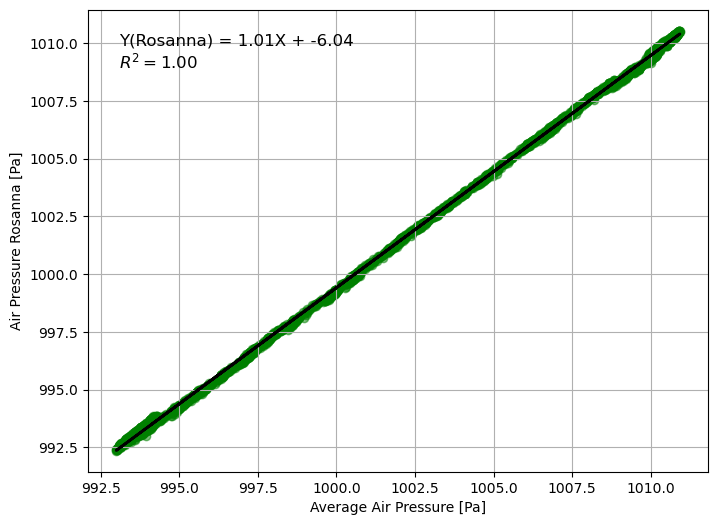

In [125]:
# Layla Pressure
df_scatter_layla_pressure = df_layla_filtered[['air_pressure']].merge(df_avg_pressure[['pressure_avg']], left_index=True, right_index=True, how='inner')

slope, intercept, r_value, p_value, std_err = linregress(df_scatter_layla_pressure['pressure_avg'], df_scatter_layla_pressure['air_pressure'])
regression_line = slope * df_scatter_layla_pressure['pressure_avg'] + intercept

plt.figure(figsize=(8, 6))
plt.scatter(df_scatter_layla_pressure['pressure_avg'], df_scatter_layla_pressure['air_pressure'], color='blue', alpha=0.5)
plt.plot(df_scatter_layla_pressure['pressure_avg'], regression_line, color='black', linewidth=2)

equation_text = f'Y(Layla) = {slope:.2f}X + {intercept:.2f}\n$R^2 = {r_value**2:.2f}$'

plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color='black')
plt.xlabel('Average Air Pressure [Pa]')
plt.ylabel('Air Pressure Layla [Pa]')
plt.grid(True)
plt.show()


# Rosanna Pressure
df_scatter_rosanna_pressure = df_rosanna_filtered[['air_pressure']].merge(df_avg_pressure[['pressure_avg']], left_index=True, right_index=True, how='inner')

slope, intercept, r_value, p_value, std_err = linregress(df_scatter_rosanna_pressure['pressure_avg'], df_scatter_rosanna_pressure['air_pressure'])
regression_line = slope * df_scatter_rosanna_pressure['pressure_avg'] + intercept

plt.figure(figsize=(8, 6))
plt.scatter(df_scatter_rosanna_pressure['pressure_avg'], df_scatter_rosanna_pressure['air_pressure'], color='green', alpha=0.5)
plt.plot(df_scatter_rosanna_pressure['pressure_avg'], regression_line, color='black', linewidth=2)

equation_text = f'Y(Rosanna) = {slope:.2f}X + {intercept:.2f}\n$R^2 = {r_value**2:.2f}$'

plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color='black')
plt.xlabel('Average Air Pressure [Pa]')
plt.ylabel('Air Pressure Rosanna [Pa]')
plt.grid(True)
plt.show()

HUMIDITY

time series

Layla Data after filtering:
                      RECORD  BattV  temperature  rel_humidity  wind_speed  \
TIMESTAMP                                                                    
2025-01-22 17:03:00  12888.0  12.38       -5.457         59.60       1.215   
2025-01-22 17:04:00  12889.0  12.38       -5.670         59.05       1.222   
2025-01-22 17:05:00  12890.0  12.39       -5.763         59.59       0.467   
2025-01-22 17:06:00  12891.0  12.39       -5.849         59.89       0.416   
2025-01-22 17:07:00  12892.0  12.39       -5.899         59.97       0.224   

                     gust_speed  wind_direction  air_pressure  \
TIMESTAMP                                                       
2025-01-22 17:03:00       2.078           287.3      994.6115   
2025-01-22 17:04:00       1.882           292.3      994.6237   
2025-01-22 17:05:00       1.254           308.4      994.5728   
2025-01-22 17:06:00       1.058           280.5      994.5925   
2025-01-22 17:07:00       0.549    

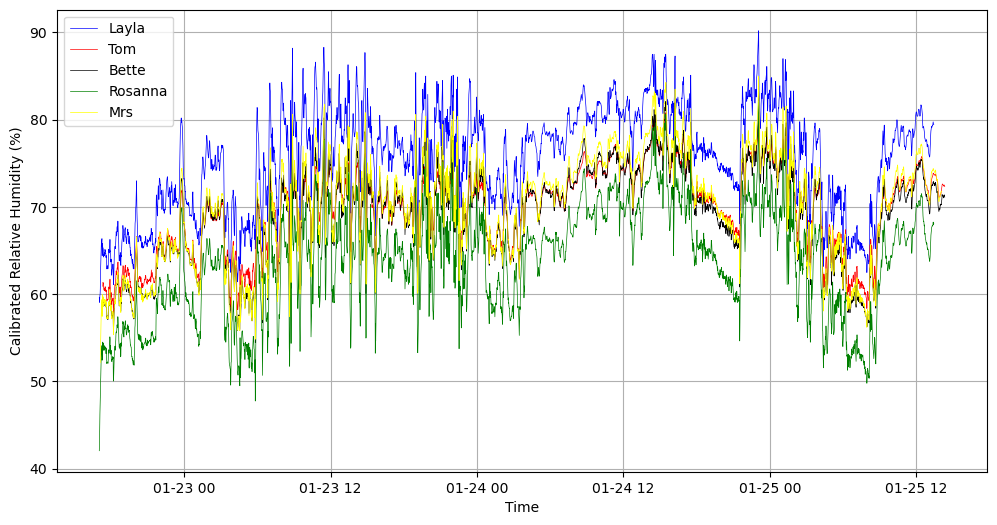

In [126]:
# Gemeinsamen Zeitstempel für beide DataFrames finden
common_index = df_layla_filtered.index.intersection(df_rosanna_filtered.index)

# DataFrames auf den gemeinsamen Index zuschneiden
df_layla_filtered_humidity = df_layla_filtered.loc[common_index]
df_rosanna_filtered_humidity = df_rosanna_filtered.loc[common_index]

# Entfernen von Nullwerten für relative Luftfeuchtigkeit
df_layla_filtered_humidity = df_layla_filtered_humidity[df_layla_filtered_humidity['rel_humidity'] != 0]
df_rosanna_filtered_humidity = df_rosanna_filtered_humidity[df_rosanna_filtered_humidity['rel_humidity'] != 0]
df_mrsrobinson_filtered_humidity = df_mrsrobinson_filtered[df_mrsrobinson_filtered['rel_humidity'] != 0]
df_bettedavis_filtered_humidity = df_bettedavis_filtered[df_bettedavis_filtered['rel_humidity'] != 0]
df_tomjoad_filtered_humidity = df_tomjoad_filtered[df_tomjoad_filtered['rel_humidity'] != 0]

#cut out manualy (peaks - weird)
df_layla_filtered_humidity = df_layla_filtered_humidity.iloc[50:-70]
df_rosanna_filtered_humidity = df_rosanna_filtered_humidity.iloc[50:-70]
df_mrsrobinson_filtered_humidity = df_mrsrobinson_filtered_humidity.iloc[50:-70]
df_bettedavis_filtered_humidity = df_bettedavis_filtered_humidity.iloc[50:-70]
df_tomjoad_filtered_humidity = df_tomjoad_filtered_humidity.iloc[50:-70]

# Überprüfen, ob Nullwerte entfernt wurden
print("Layla Data after filtering:")
print(df_layla_filtered_humidity.head())
print("Rosanna Data after filtering:")
print(df_rosanna_filtered_humidity.head())
print("Mrs Robinson Data after filtering:")
print(df_mrsrobinson_filtered_humidity.head())
print("Bette Davis Data after filtering:")
print(df_bettedavis_filtered_humidity.head())
print("Tom Joad Data after filtering:")
print(df_tomjoad_filtered_humidity.head())

# Plot für relative Luftfeuchtigkeit nach dem Entfernen der Nullwerte und der ersten/letzten Werte
plt.figure(figsize=(12, 6))

# Relative Luftfeuchtigkeit für jede Station mit der Zeit auf der x-Achse
plt.plot(df_layla_filtered_humidity.index, df_layla_filtered_humidity['rel_humidity'], label='Layla', color='blue', linewidth=0.5)
plt.plot(df_tomjoad_filtered_humidity.index, df_tomjoad_filtered_humidity['rel_humidity'], label='Tom', color='red', linewidth=0.5)
plt.plot(df_bettedavis_filtered_humidity.index, df_bettedavis_filtered_humidity['rel_humidity'], label='Bette', color='black', linewidth=0.5)
plt.plot(df_rosanna_filtered_humidity.index, df_rosanna_filtered_humidity['rel_humidity'], label='Rosanna', color='green', linewidth=0.5)
plt.plot(df_mrsrobinson_filtered_humidity.index, df_mrsrobinson_filtered_humidity['rel_humidity'], label='Mrs', color='yellow', linewidth=0.5)

# Diagramm formatieren
plt.xlabel('Time')
plt.ylabel('Calibrated Relative Humidity (%)')  # Label angepasst für relative Luftfeuchtigkeit
plt.legend()
plt.grid(True)

# Diagramm anzeigen
plt.show()




averaging

                     humidity_avg
TIMESTAMP                        
2025-01-22 17:03:00      50.82184
2025-01-22 17:04:00      51.08866
2025-01-22 17:05:00      52.37438
2025-01-22 17:06:00      53.05933
2025-01-22 17:07:00      53.47784


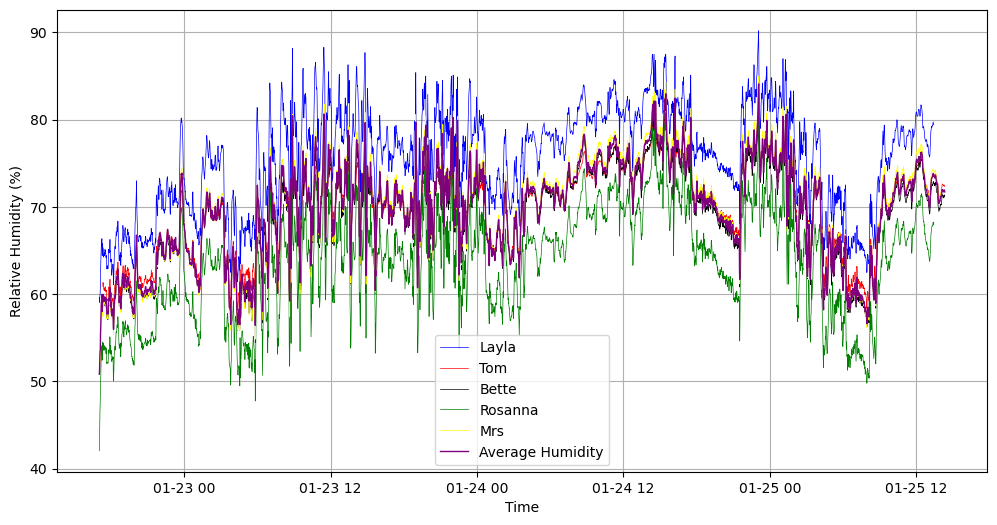

In [127]:
# DataFrames mit den Zeitstempeln (Index) und der relativen Luftfeuchtigkeit
df_avg = df_layla_filtered_humidity[['rel_humidity']].rename(columns={'rel_humidity': 'layla_humidity'})

# Merge mit den anderen Stationen unter Verwendung des Index als Zeitstempel
df_avg = df_avg.merge(df_rosanna_filtered_humidity[['rel_humidity']].rename(columns={'rel_humidity': 'rosanna_humidity'}), left_index=True, right_index=True, how='outer')
df_avg = df_avg.merge(df_mrsrobinson_filtered_humidity[['rel_humidity']].rename(columns={'rel_humidity': 'mrsrobinson_humidity'}), left_index=True, right_index=True, how='outer')
df_avg = df_avg.merge(df_bettedavis_filtered_humidity[['rel_humidity']].rename(columns={'rel_humidity': 'bettedavis_humidity'}), left_index=True, right_index=True, how='outer')
df_avg = df_avg.merge(df_tomjoad_filtered_humidity[['rel_humidity']].rename(columns={'rel_humidity': 'tomjoad_humidity'}), left_index=True, right_index=True, how='outer')

# Mittelwert der relativen Luftfeuchtigkeit berechnen
df_avg['humidity_avg'] = df_avg[['layla_humidity', 'rosanna_humidity', 'mrsrobinson_humidity', 'bettedavis_humidity', 'tomjoad_humidity']].mean(axis=1, skipna=True)

# Nur die Spalten mit Zeit (Index) und dem Mittelwert behalten
df_avg = df_avg[['humidity_avg']]

# Ausgabe der ersten Zeilen der berechneten Mittelwerte
print(df_avg.head())

# Plot der relativen Luftfeuchtigkeit für jede Station und den Mittelwert
plt.figure(figsize=(12, 6))

# Relative Luftfeuchtigkeit für jede Station mit der Zeit auf der x-Achse
plt.plot(df_layla_filtered_humidity.index, df_layla_filtered_humidity['rel_humidity'], label='Layla', color='blue', linewidth=0.5)
plt.plot(df_tomjoad_filtered_humidity.index, df_tomjoad_filtered_humidity['rel_humidity'], label='Tom', color='red', linewidth=0.5)
plt.plot(df_bettedavis_filtered_humidity.index, df_bettedavis_filtered_humidity['rel_humidity'], label='Bette', color='black', linewidth=0.5)
plt.plot(df_rosanna_filtered_humidity.index, df_rosanna_filtered_humidity['rel_humidity'], label='Rosanna', color='green', linewidth=0.5)
plt.plot(df_mrsrobinson_filtered_humidity.index, df_mrsrobinson_filtered_humidity['rel_humidity'], label='Mrs', color='yellow', linewidth=0.5)

# Mittelwert plotten
plt.plot(df_avg.index, df_avg['humidity_avg'], label='Average Humidity', color='purple', linewidth=1)

# Diagramm formatieren
plt.xlabel('Time')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.grid(True)

# Diagramm anzeigen
plt.show()


calibration

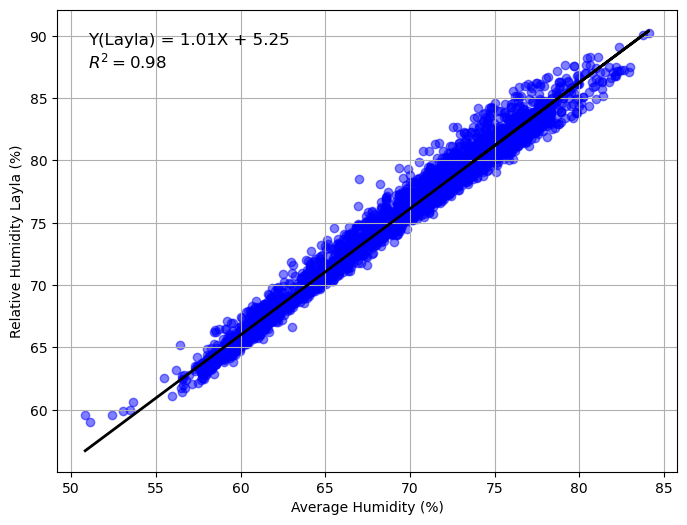

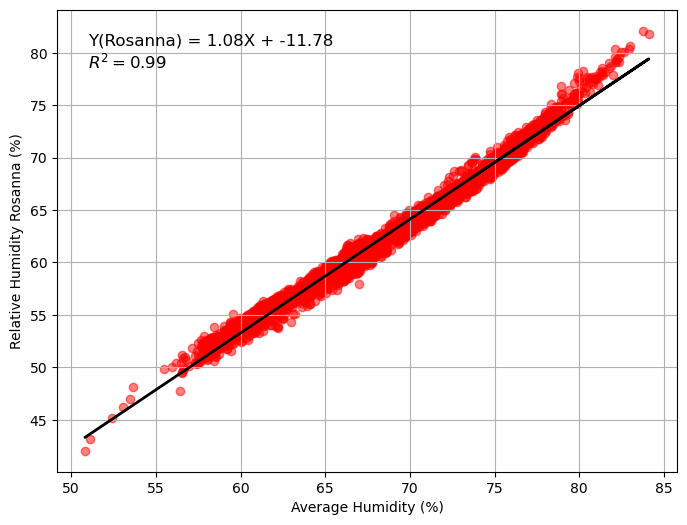

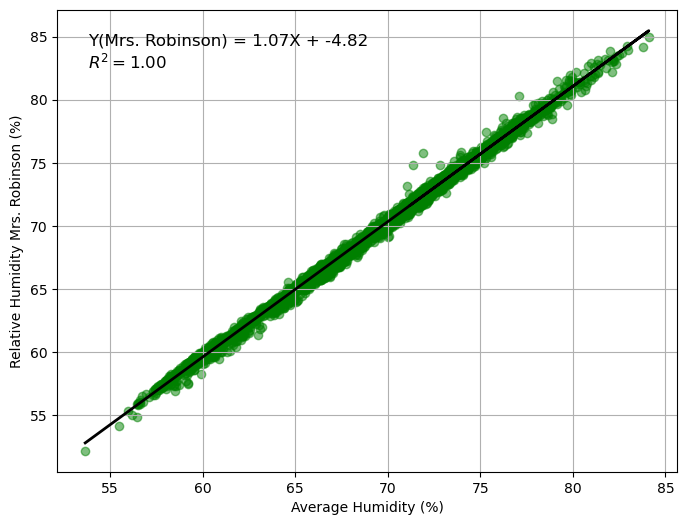

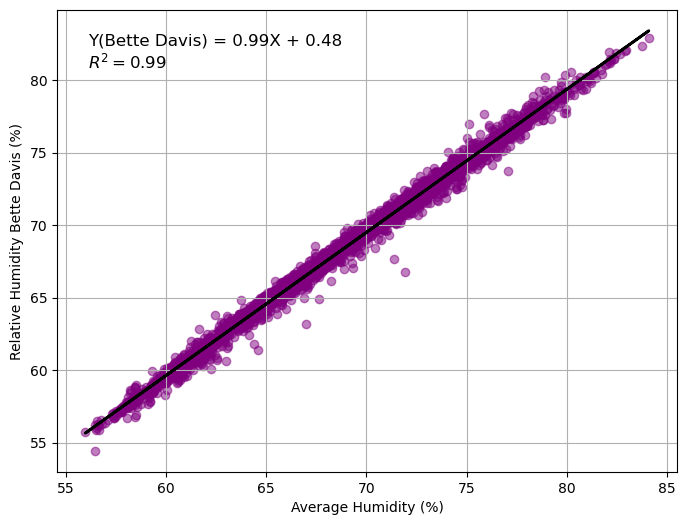

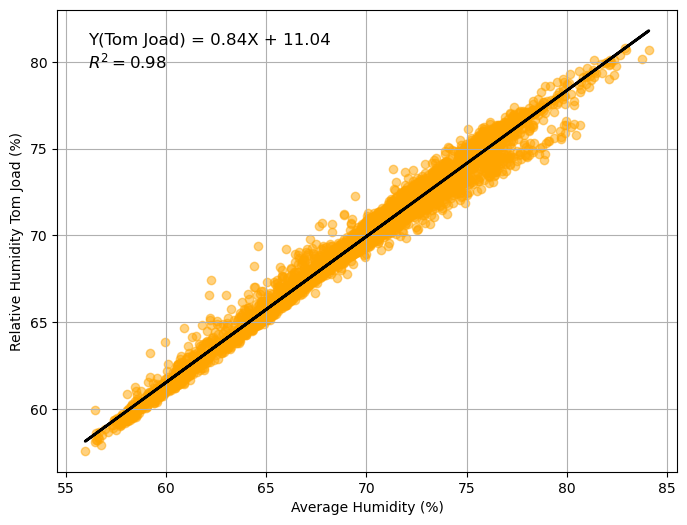

In [128]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

#----------------------------------------------------------------------------------------------------
# Layla Relative Humidity
df_scatter_layla = df_layla_filtered_humidity[['rel_humidity']].merge(df_avg[['humidity_avg']], left_index=True, right_index=True, how='inner')

slope, intercept, r_value, p_value, std_err = linregress(df_scatter_layla['humidity_avg'], df_scatter_layla['rel_humidity'])
regression_line = slope * df_scatter_layla['humidity_avg'] + intercept

plt.figure(figsize=(8, 6))
plt.scatter(df_scatter_layla['humidity_avg'], df_scatter_layla['rel_humidity'], color='blue', alpha=0.5)
plt.plot(df_scatter_layla['humidity_avg'], regression_line, color='black', linewidth=2)

equation_text = f'Y(Layla) = {slope:.2f}X + {intercept:.2f}\n$R^2 = {r_value**2:.2f}$'

plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color='black')
plt.xlabel('Average Humidity (%)')
plt.ylabel('Relative Humidity Layla (%)')
plt.grid(True)
plt.show()

#----------------------------------------------------------------------------------------------------
# Rosanna Relative Humidity
df_scatter_rosanna = df_rosanna_filtered_humidity[['rel_humidity']].merge(df_avg[['humidity_avg']], left_index=True, right_index=True, how='inner')

slope, intercept, r_value, p_value, std_err = linregress(df_scatter_rosanna['humidity_avg'], df_scatter_rosanna['rel_humidity'])
regression_line = slope * df_scatter_rosanna['humidity_avg'] + intercept

plt.figure(figsize=(8, 6))
plt.scatter(df_scatter_rosanna['humidity_avg'], df_scatter_rosanna['rel_humidity'], color='red', alpha=0.5)
plt.plot(df_scatter_rosanna['humidity_avg'], regression_line, color='black', linewidth=2)

equation_text = f'Y(Rosanna) = {slope:.2f}X + {intercept:.2f}\n$R^2 = {r_value**2:.2f}$'

plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color='black')
plt.xlabel('Average Humidity (%)')
plt.ylabel('Relative Humidity Rosanna (%)')
plt.grid(True)
plt.show()

#----------------------------------------------------------------------------------------------------
# Mrs. Robinson Relative Humidity
df_scatter_mrsrobinson = df_mrsrobinson_filtered_humidity[['rel_humidity']].merge(df_avg[['humidity_avg']], left_index=True, right_index=True, how='inner')

slope, intercept, r_value, p_value, std_err = linregress(df_scatter_mrsrobinson['humidity_avg'], df_scatter_mrsrobinson['rel_humidity'])
regression_line = slope * df_scatter_mrsrobinson['humidity_avg'] + intercept

plt.figure(figsize=(8, 6))
plt.scatter(df_scatter_mrsrobinson['humidity_avg'], df_scatter_mrsrobinson['rel_humidity'], color='green', alpha=0.5)
plt.plot(df_scatter_mrsrobinson['humidity_avg'], regression_line, color='black', linewidth=2)

equation_text = f'Y(Mrs. Robinson) = {slope:.2f}X + {intercept:.2f}\n$R^2 = {r_value**2:.2f}$'

plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color='black')
plt.xlabel('Average Humidity (%)')
plt.ylabel('Relative Humidity Mrs. Robinson (%)')
plt.grid(True)
plt.show()

#----------------------------------------------------------------------------------------------------
# Bette Davis Relative Humidity
df_scatter_bettedavis = df_bettedavis_filtered_humidity[['rel_humidity']].merge(df_avg[['humidity_avg']], left_index=True, right_index=True, how='inner')

slope, intercept, r_value, p_value, std_err = linregress(df_scatter_bettedavis['humidity_avg'], df_scatter_bettedavis['rel_humidity'])
regression_line = slope * df_scatter_bettedavis['humidity_avg'] + intercept

plt.figure(figsize=(8, 6))
plt.scatter(df_scatter_bettedavis['humidity_avg'], df_scatter_bettedavis['rel_humidity'], color='purple', alpha=0.5)
plt.plot(df_scatter_bettedavis['humidity_avg'], regression_line, color='black', linewidth=2)

equation_text = f'Y(Bette Davis) = {slope:.2f}X + {intercept:.2f}\n$R^2 = {r_value**2:.2f}$'

plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color='black')
plt.xlabel('Average Humidity (%)')
plt.ylabel('Relative Humidity Bette Davis (%)')
plt.grid(True)
plt.show()

#----------------------------------------------------------------------------------------------------
# Tom Joad Relative Humidity
df_scatter_tomjoad = df_tomjoad_filtered_humidity[['rel_humidity']].merge(df_avg[['humidity_avg']], left_index=True, right_index=True, how='inner')

slope, intercept, r_value, p_value, std_err = linregress(df_scatter_tomjoad['humidity_avg'], df_scatter_tomjoad['rel_humidity'])
regression_line = slope * df_scatter_tomjoad['humidity_avg'] + intercept

plt.figure(figsize=(8, 6))
plt.scatter(df_scatter_tomjoad['humidity_avg'], df_scatter_tomjoad['rel_humidity'], color='orange', alpha=0.5)
plt.plot(df_scatter_tomjoad['humidity_avg'], regression_line, color='black', linewidth=2)

equation_text = f'Y(Tom Joad) = {slope:.2f}X + {intercept:.2f}\n$R^2 = {r_value**2:.2f}$'

plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color='black')
plt.xlabel('Average Humidity (%)')
plt.ylabel('Relative Humidity Tom Joad (%)')
plt.grid(True)
plt.show()


TEMPERATURE

time series

Layla Data after filtering:
                      RECORD  BattV  temperature  rel_humidity  wind_speed  \
TIMESTAMP                                                                    
2025-01-22 17:08:00  12893.0  12.39       -5.946         60.65       0.366   
2025-01-22 17:09:00  12894.0  12.38       -6.016         62.51       0.047   
2025-01-22 17:10:00  12895.0  12.38       -6.137         63.18       0.029   
2025-01-22 17:11:00  12896.0  12.38       -6.230         64.20       0.399   
2025-01-22 17:12:00  12897.0  12.38       -6.350         64.97       0.565   

                     gust_speed  wind_direction  air_pressure  \
TIMESTAMP                                                       
2025-01-22 17:08:00       0.549           280.6      994.5526   
2025-01-22 17:09:00       0.490           246.0      994.5626   
2025-01-22 17:10:00       0.235           245.5      994.5707   
2025-01-22 17:11:00       0.804           240.4      994.5823   
2025-01-22 17:12:00       1.117    

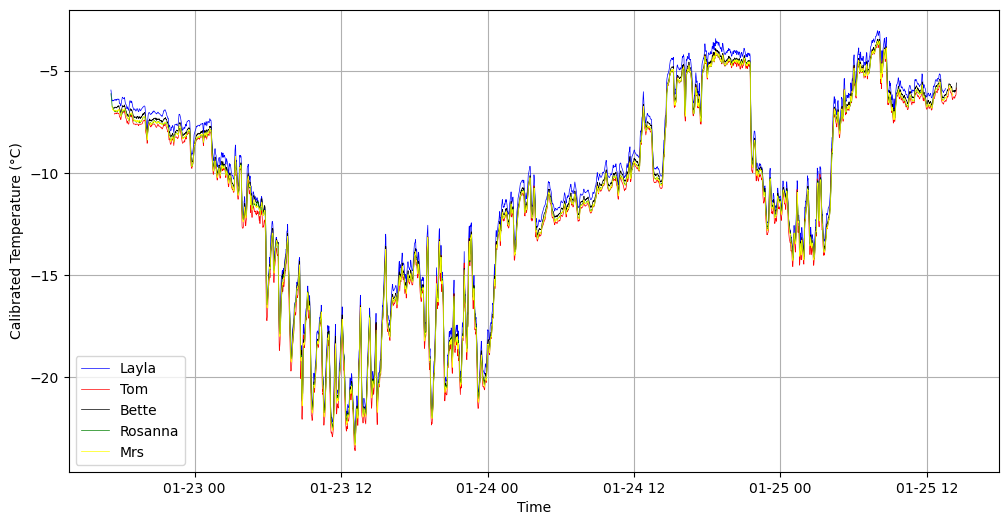

In [129]:
# Gemeinsamen Zeitstempel für beide DataFrames finden
common_index = df_layla_filtered.index.intersection(df_rosanna_filtered.index)

# DataFrames auf den gemeinsamen Index zuschneiden
df_layla_filtered_temperature = df_layla_filtered.loc[common_index]
df_rosanna_filtered_temperature = df_rosanna_filtered.loc[common_index]

# Entfernen von Nullwerten für Temperatur
df_layla_filtered_temperature = df_layla_filtered_temperature[df_layla_filtered_temperature['temperature'] != 0]
df_rosanna_filtered_temperature = df_rosanna_filtered_temperature[df_rosanna_filtered_temperature['temperature'] != 0]
df_mrsrobinson_filtered_temperature = df_mrsrobinson_filtered[df_mrsrobinson_filtered['temperature'] != 0]
df_bettedavis_filtered_temperature = df_bettedavis_filtered[df_bettedavis_filtered['temperature'] != 0]
df_tomjoad_filtered_temperature = df_tomjoad_filtered[df_tomjoad_filtered['temperature'] != 0]

# cut out manually (peaks - weird)
df_layla_filtered_temperature = df_layla_filtered_temperature.iloc[55:-65]
df_rosanna_filtered_temperature = df_rosanna_filtered_temperature.iloc[55:-65]
df_mrsrobinson_filtered_temperature = df_mrsrobinson_filtered_temperature.iloc[55:-65]
df_bettedavis_filtered_temperature = df_bettedavis_filtered_temperature.iloc[55:-65]
df_tomjoad_filtered_temperature = df_tomjoad_filtered_temperature.iloc[55:-65]

# Überprüfen, ob Nullwerte entfernt wurden
print("Layla Data after filtering:")
print(df_layla_filtered_temperature.head())
print("Rosanna Data after filtering:")
print(df_rosanna_filtered_temperature.head())
print("Mrs Robinson Data after filtering:")
print(df_mrsrobinson_filtered_temperature.head())
print("Bette Davis Data after filtering:")
print(df_bettedavis_filtered_temperature.head())
print("Tom Joad Data after filtering:")
print(df_tomjoad_filtered_temperature.head())

# Plot für Temperatur nach dem Entfernen der Nullwerte und der ersten/letzten Werte
plt.figure(figsize=(12, 6))

# Temperatur für jede Station mit der Zeit auf der x-Achse
plt.plot(df_layla_filtered_temperature.index, df_layla_filtered_temperature['temperature'], label='Layla', color='blue', linewidth=0.5)
plt.plot(df_tomjoad_filtered_temperature.index, df_tomjoad_filtered_temperature['temperature'], label='Tom', color='red', linewidth=0.5)
plt.plot(df_bettedavis_filtered_temperature.index, df_bettedavis_filtered_temperature['temperature'], label='Bette', color='black', linewidth=0.5)
plt.plot(df_rosanna_filtered_temperature.index, df_rosanna_filtered_temperature['temperature'], label='Rosanna', color='green', linewidth=0.5)
plt.plot(df_mrsrobinson_filtered_temperature.index, df_mrsrobinson_filtered_temperature['temperature'], label='Mrs', color='yellow', linewidth=0.5)

# Diagramm formatieren
plt.xlabel('Time')
plt.ylabel('Calibrated Temperature (°C)')  # Label angepasst für Temperatur
plt.legend()
plt.grid(True)

# Diagramm anzeigen
plt.show()


averaging

                     temperature_avg
TIMESTAMP                           
2025-01-22 17:08:00        -6.034776
2025-01-22 17:09:00        -6.110095
2025-01-22 17:10:00        -6.225032
2025-01-22 17:11:00        -6.314012
2025-01-22 17:12:00        -6.442694


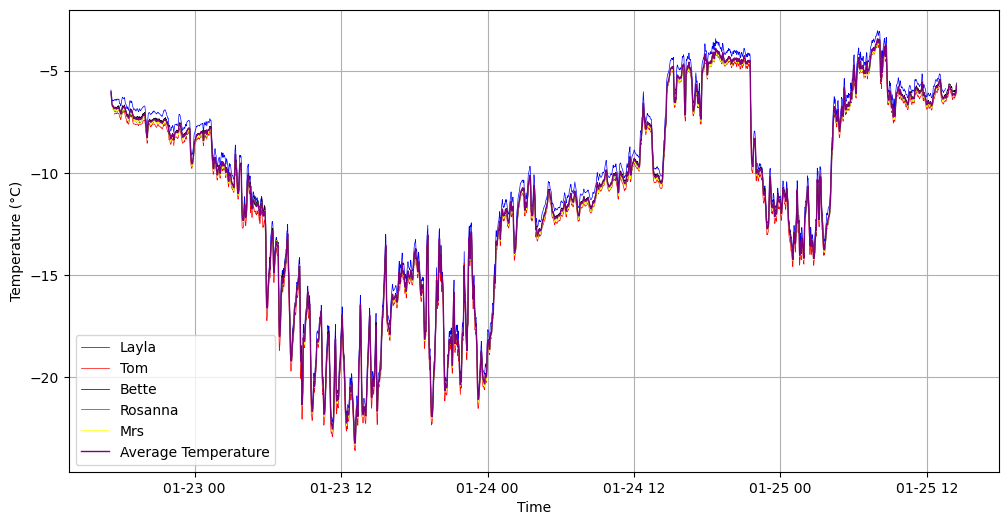

In [130]:
# DataFrames mit den Zeitstempeln (Index) und der Temperatur
df_avg = df_layla_filtered_temperature[['temperature']].rename(columns={'temperature': 'layla_temperature'})

# Merge mit den anderen Stationen unter Verwendung des Index als Zeitstempel
df_avg = df_avg.merge(df_rosanna_filtered_temperature[['temperature']].rename(columns={'temperature': 'rosanna_temperature'}), left_index=True, right_index=True, how='outer')
df_avg = df_avg.merge(df_mrsrobinson_filtered_temperature[['temperature']].rename(columns={'temperature': 'mrsrobinson_temperature'}), left_index=True, right_index=True, how='outer')
df_avg = df_avg.merge(df_bettedavis_filtered_temperature[['temperature']].rename(columns={'temperature': 'bettedavis_temperature'}), left_index=True, right_index=True, how='outer')
df_avg = df_avg.merge(df_tomjoad_filtered_temperature[['temperature']].rename(columns={'temperature': 'tomjoad_temperature'}), left_index=True, right_index=True, how='outer')

# Mittelwert der Temperaturen berechnen
df_avg['temperature_avg'] = df_avg[['layla_temperature', 'rosanna_temperature', 'mrsrobinson_temperature', 'bettedavis_temperature', 'tomjoad_temperature']].mean(axis=1, skipna=True)

# Nur die Spalten mit Zeit (Index) und dem Mittelwert behalten
df_avg = df_avg[['temperature_avg']]

# Ausgabe der ersten Zeilen der berechneten Mittelwerte
print(df_avg.head())

# Plot der Temperatur für jede Station und den Mittelwert
plt.figure(figsize=(12, 6))

# Temperatur für jede Station mit der Zeit auf der x-Achse
plt.plot(df_layla_filtered_temperature.index, df_layla_filtered_temperature['temperature'], label='Layla', color='blue', linewidth=0.5)
plt.plot(df_tomjoad_filtered_temperature.index, df_tomjoad_filtered_temperature['temperature'], label='Tom', color='red', linewidth=0.5)
plt.plot(df_bettedavis_filtered_temperature.index, df_bettedavis_filtered_temperature['temperature'], label='Bette', color='black', linewidth=0.5)
plt.plot(df_rosanna_filtered_temperature.index, df_rosanna_filtered_temperature['temperature'], label='Rosanna', color='green', linewidth=0.5)
plt.plot(df_mrsrobinson_filtered_temperature.index, df_mrsrobinson_filtered_temperature['temperature'], label='Mrs', color='yellow', linewidth=0.5)

# Mittelwert plotten
plt.plot(df_avg.index, df_avg['temperature_avg'], label='Average Temperature', color='purple', linewidth=1)

# Diagramm formatieren
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')  # Label angepasst für Temperatur
plt.legend()
plt.grid(True)

# Diagramm anzeigen
plt.show()


calibration

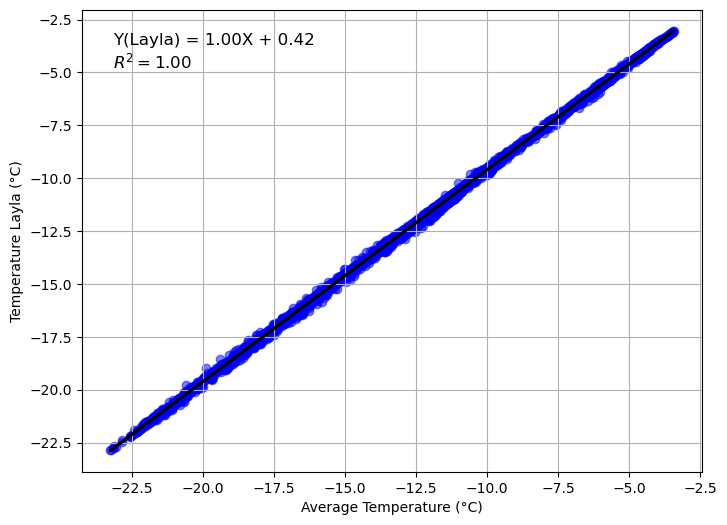

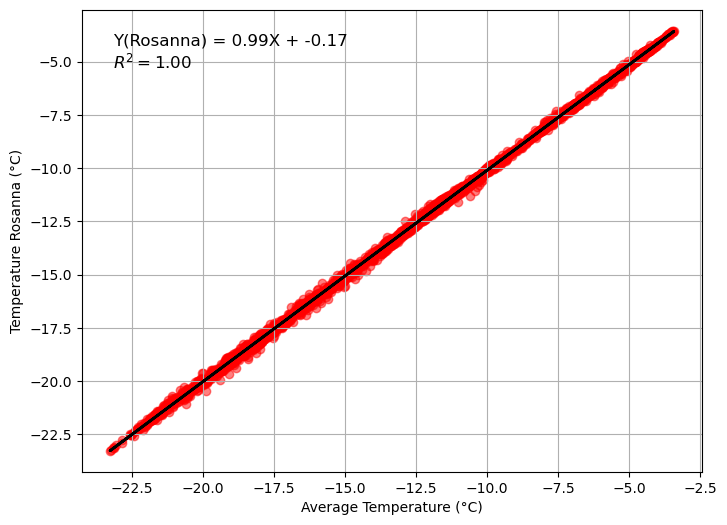

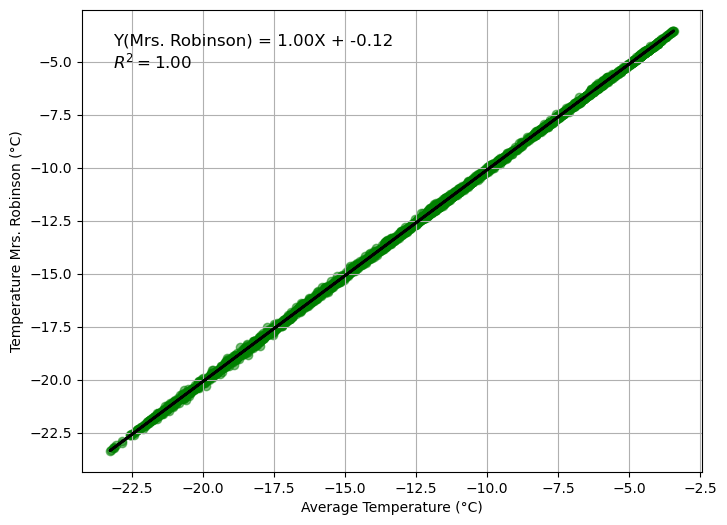

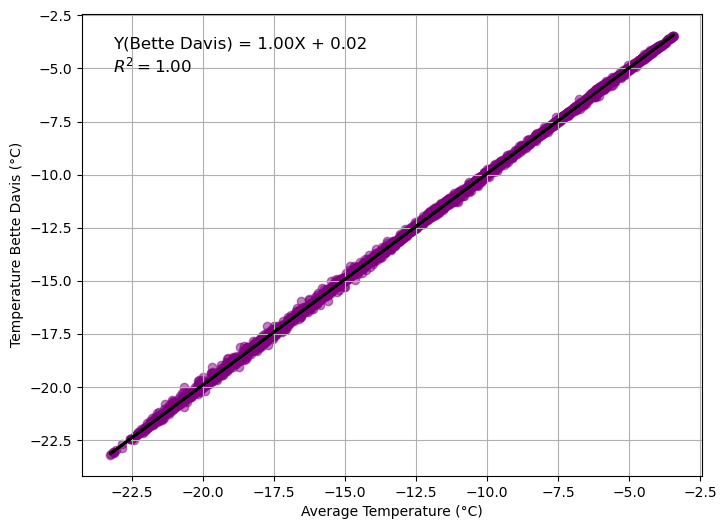

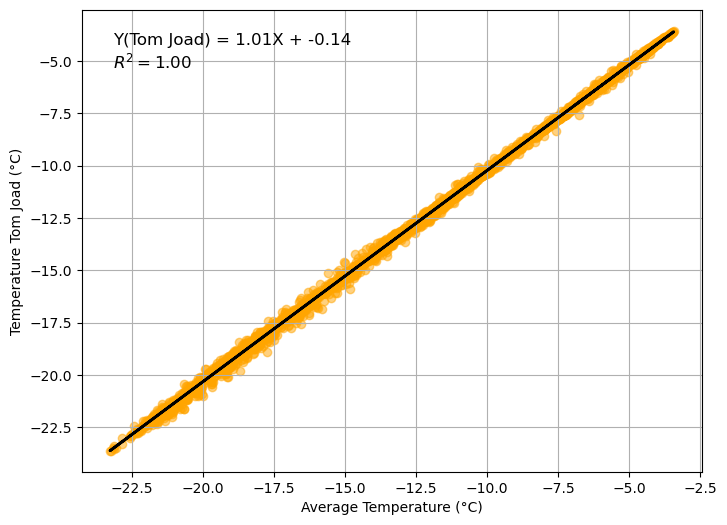

In [131]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

#----------------------------------------------------------------------------------------------------
# Layla Temperature
df_scatter_layla = df_layla_filtered_temperature[['temperature']].merge(df_avg[['temperature_avg']], left_index=True, right_index=True, how='inner')

slope, intercept, r_value, p_value, std_err = linregress(df_scatter_layla['temperature_avg'], df_scatter_layla['temperature'])
regression_line = slope * df_scatter_layla['temperature_avg'] + intercept

plt.figure(figsize=(8, 6))
plt.scatter(df_scatter_layla['temperature_avg'], df_scatter_layla['temperature'], color='blue', alpha=0.5)
plt.plot(df_scatter_layla['temperature_avg'], regression_line, color='black', linewidth=2)

equation_text = f'Y(Layla) = {slope:.2f}X + {intercept:.2f}\n$R^2 = {r_value**2:.2f}$'

plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color='black')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Temperature Layla (°C)')
plt.grid(True)
plt.show()

#----------------------------------------------------------------------------------------------------
# Rosanna Temperature
df_scatter_rosanna = df_rosanna_filtered_temperature[['temperature']].merge(df_avg[['temperature_avg']], left_index=True, right_index=True, how='inner')

slope, intercept, r_value, p_value, std_err = linregress(df_scatter_rosanna['temperature_avg'], df_scatter_rosanna['temperature'])
regression_line = slope * df_scatter_rosanna['temperature_avg'] + intercept

plt.figure(figsize=(8, 6))
plt.scatter(df_scatter_rosanna['temperature_avg'], df_scatter_rosanna['temperature'], color='red', alpha=0.5)
plt.plot(df_scatter_rosanna['temperature_avg'], regression_line, color='black', linewidth=2)

equation_text = f'Y(Rosanna) = {slope:.2f}X + {intercept:.2f}\n$R^2 = {r_value**2:.2f}$'

plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color='black')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Temperature Rosanna (°C)')
plt.grid(True)
plt.show()

#----------------------------------------------------------------------------------------------------
# Mrs. Robinson Temperature
df_scatter_mrsrobinson = df_mrsrobinson_filtered_temperature[['temperature']].merge(df_avg[['temperature_avg']], left_index=True, right_index=True, how='inner')

slope, intercept, r_value, p_value, std_err = linregress(df_scatter_mrsrobinson['temperature_avg'], df_scatter_mrsrobinson['temperature'])
regression_line = slope * df_scatter_mrsrobinson['temperature_avg'] + intercept

plt.figure(figsize=(8, 6))
plt.scatter(df_scatter_mrsrobinson['temperature_avg'], df_scatter_mrsrobinson['temperature'], color='green', alpha=0.5)
plt.plot(df_scatter_mrsrobinson['temperature_avg'], regression_line, color='black', linewidth=2)

equation_text = f'Y(Mrs. Robinson) = {slope:.2f}X + {intercept:.2f}\n$R^2 = {r_value**2:.2f}$'

plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color='black')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Temperature Mrs. Robinson (°C)')
plt.grid(True)
plt.show()

#----------------------------------------------------------------------------------------------------
# Bette Davis Temperature
df_scatter_bettedavis = df_bettedavis_filtered_temperature[['temperature']].merge(df_avg[['temperature_avg']], left_index=True, right_index=True, how='inner')

slope, intercept, r_value, p_value, std_err = linregress(df_scatter_bettedavis['temperature_avg'], df_scatter_bettedavis['temperature'])
regression_line = slope * df_scatter_bettedavis['temperature_avg'] + intercept

plt.figure(figsize=(8, 6))
plt.scatter(df_scatter_bettedavis['temperature_avg'], df_scatter_bettedavis['temperature'], color='purple', alpha=0.5)
plt.plot(df_scatter_bettedavis['temperature_avg'], regression_line, color='black', linewidth=2)

equation_text = f'Y(Bette Davis) = {slope:.2f}X + {intercept:.2f}\n$R^2 = {r_value**2:.2f}$'

plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color='black')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Temperature Bette Davis (°C)')
plt.grid(True)
plt.show()

#----------------------------------------------------------------------------------------------------
# Tom Joad Temperature
df_scatter_tomjoad = df_tomjoad_filtered_temperature[['temperature']].merge(df_avg[['temperature_avg']], left_index=True, right_index=True, how='inner')

slope, intercept, r_value, p_value, std_err = linregress(df_scatter_tomjoad['temperature_avg'], df_scatter_tomjoad['temperature'])
regression_line = slope * df_scatter_tomjoad['temperature_avg'] + intercept

plt.figure(figsize=(8, 6))
plt.scatter(df_scatter_tomjoad['temperature_avg'], df_scatter_tomjoad['temperature'], color='orange', alpha=0.5)
plt.plot(df_scatter_tomjoad['temperature_avg'], regression_line, color='black', linewidth=2)

equation_text = f'Y(Tom Joad) = {slope:.2f}X + {intercept:.2f}\n$R^2 = {r_value**2:.2f}$'

plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color='black')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Temperature Tom Joad (°C)')
plt.grid(True)
plt.show()


WIND DIRECTION

time series

Layla Wind Direction Data after filtering:
                      RECORD  BattV  temperature  rel_humidity  wind_speed  \
TIMESTAMP                                                                    
2025-01-22 16:30:00  12855.0  12.39        21.47         37.95         0.0   
2025-01-22 16:31:00  12856.0  12.39        21.46         37.95         0.0   
2025-01-22 16:32:00  12857.0  12.39        21.45         37.81         0.0   
2025-01-22 16:33:00  12858.0  12.39        21.44         37.71         0.0   
2025-01-22 16:34:00  12859.0  12.39        21.42         38.01         0.0   

                     gust_speed  wind_direction  air_pressure  \
TIMESTAMP                                                       
2025-01-22 16:30:00         0.0           310.0      994.5355   
2025-01-22 16:31:00         0.0           309.9      994.4674   
2025-01-22 16:32:00         0.0           309.8      994.4677   
2025-01-22 16:33:00         0.0           304.8      994.4678   
2025-01-22 16:34:00 

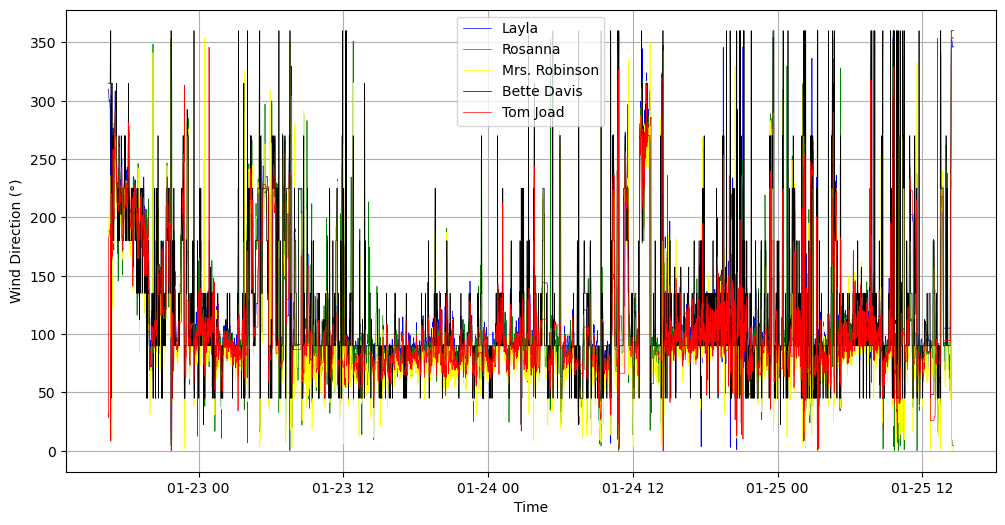

In [132]:
# Gemeinsamen Zeitstempel für alle DataFrames finden
common_index = df_layla_filtered.index.intersection(df_rosanna_filtered.index).intersection(df_mrsrobinson_filtered.index).intersection(df_bettedavis_filtered.index).intersection(df_tomjoad_filtered.index)

# DataFrames auf den gemeinsamen Index zuschneiden
df_layla_filtered_wind_direction = df_layla_filtered.loc[common_index]
df_rosanna_filtered_wind_direction = df_rosanna_filtered.loc[common_index]
df_mrsrobinson_filtered_wind_direction = df_mrsrobinson_filtered.loc[common_index]
df_bettedavis_filtered_wind_direction = df_bettedavis_filtered.loc[common_index]
df_tomjoad_filtered_wind_direction = df_tomjoad_filtered.loc[common_index]

# Entfernen von Nullwerten für Windrichtung (auf alle DataFrames anwenden)
df_layla_filtered_wind_direction = df_layla_filtered_wind_direction[df_layla_filtered_wind_direction['wind_direction'] != 0]
df_rosanna_filtered_wind_direction = df_rosanna_filtered_wind_direction[df_rosanna_filtered_wind_direction['wind_direction'] != 0]
df_mrsrobinson_filtered_wind_direction = df_mrsrobinson_filtered_wind_direction[df_mrsrobinson_filtered_wind_direction['wind_direction'] != 0]
df_bettedavis_filtered_wind_direction = df_bettedavis_filtered_wind_direction[df_bettedavis_filtered_wind_direction['wind_direction'] != 0]
df_tomjoad_filtered_wind_direction = df_tomjoad_filtered_wind_direction[df_tomjoad_filtered_wind_direction['wind_direction'] != 0]

# Überprüfen, ob Nullwerte entfernt wurden
print("Layla Wind Direction Data after filtering:")
print(df_layla_filtered_wind_direction.head())
print("Rosanna Wind Direction Data after filtering:")
print(df_rosanna_filtered_wind_direction.head())
print("Mrs Robinson Wind Direction Data after filtering:")
print(df_mrsrobinson_filtered_wind_direction.head())
print("Bette Davis Wind Direction Data after filtering:")
print(df_bettedavis_filtered_wind_direction.head())
print("Tom Joad Wind Direction Data after filtering:")
print(df_tomjoad_filtered_wind_direction.head())

# Plot für Windrichtung nach dem Entfernen der Nullwerte
plt.figure(figsize=(12, 6))

# Windrichtung für jede Station mit der Zeit auf der x-Achse
plt.plot(df_layla_filtered_wind_direction.index, df_layla_filtered_wind_direction['wind_direction'], label='Layla', color='blue', linewidth=0.5)
plt.plot(df_rosanna_filtered_wind_direction.index, df_rosanna_filtered_wind_direction['wind_direction'], label='Rosanna', color='green', linewidth=0.5)
plt.plot(df_mrsrobinson_filtered_wind_direction.index, df_mrsrobinson_filtered_wind_direction['wind_direction'], label='Mrs. Robinson', color='yellow', linewidth=0.5)
plt.plot(df_bettedavis_filtered_wind_direction.index, df_bettedavis_filtered_wind_direction['wind_direction'], label='Bette Davis', color='black', linewidth=0.5)
plt.plot(df_tomjoad_filtered_wind_direction.index, df_tomjoad_filtered_wind_direction['wind_direction'], label='Tom Joad', color='red', linewidth=0.5)

# Diagramm formatieren
plt.xlabel('Time')
plt.ylabel('Wind Direction (°)')
plt.legend()
plt.grid(True)

# Diagramm anzeigen
plt.show()

averaging

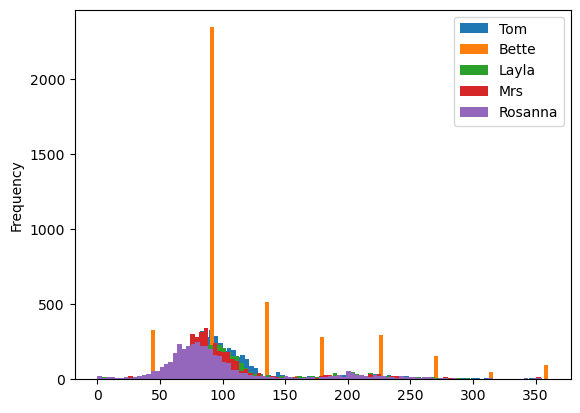

In [133]:
df_layla_filtered_wind_direction['wind_direction'].plot.hist(bins=100, label='Tom')
#f_avg_wind_direction.wind_direction_avg.plot.hist
df_bettedavis_filtered_wind_direction['wind_direction'].plot.hist(bins=100, label='Bette')
df_rosanna_filtered_wind_direction['wind_direction'].plot.hist(bins=100, label='Layla')
df_tomjoad_filtered_wind_direction['wind_direction'].plot.hist(bins=100, label='Mrs')
df_mrsrobinson_filtered_wind_direction['wind_direction'].plot.hist(bins=100, label='Rosanna')
plt.legend()

bette davis weird

decision: do not take bette in to account for averaging. average over all the other stations and then calibrate all for this average (also calibrate bette davis on this)

                     wind_direction_avg
TIMESTAMP                              
2025-01-22 16:30:00          178.734600
2025-01-22 16:31:00          178.110625
2025-01-22 16:32:00          216.295025
2025-01-22 16:33:00          218.410850
2025-01-22 16:34:00          218.841150


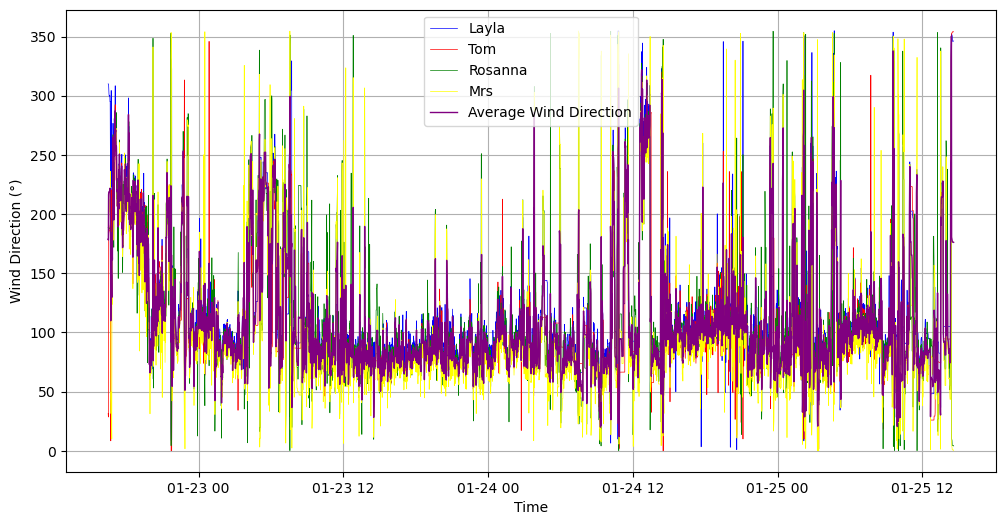

In [134]:
#without bettedavis
# DataFrames mit den Zeitstempeln (Index) und der Windrichtung
df_avg_wind = df_layla_filtered_wind_direction[['wind_direction']].rename(columns={'wind_direction': 'layla_wind_direction'})

# Merge mit den anderen Stationen unter Verwendung des Index als Zeitstempel
df_avg_wind = df_avg_wind.merge(df_rosanna_filtered_wind_direction[['wind_direction']].rename(columns={'wind_direction': 'rosanna_wind_direction'}), left_index=True, right_index=True, how='outer')
df_avg_wind = df_avg_wind.merge(df_mrsrobinson_filtered_wind_direction[['wind_direction']].rename(columns={'wind_direction': 'mrsrobinson_wind_direction'}), left_index=True, right_index=True, how='outer')
#df_avg_wind = df_avg_wind.merge(df_bettedavis_filtered_wind_direction[['wind_direction']].rename(columns={'wind_direction': 'bettedavis_wind_direction'}), left_index=True, right_index=True, how='outer')
df_avg_wind = df_avg_wind.merge(df_tomjoad_filtered_wind_direction[['wind_direction']].rename(columns={'wind_direction': 'tomjoad_wind_direction'}), left_index=True, right_index=True, how='outer')

# Mittelwert der Windrichtungen berechnen
df_avg_wind['wind_direction_avg'] = df_avg_wind[['layla_wind_direction', 'rosanna_wind_direction', 'mrsrobinson_wind_direction', 'tomjoad_wind_direction']].mean(axis=1, skipna=True)

# Nur die Spalten mit Zeit (Index) und dem Mittelwert behalten
df_avg_wind = df_avg_wind[['wind_direction_avg']]

# Ausgabe der ersten Zeilen der berechneten Mittelwerte
print(df_avg_wind.head())

# Plot der Windrichtung für jede Station und den Mittelwert
plt.figure(figsize=(12, 6))

# Windrichtung für jede Station mit der Zeit auf der x-Achse
plt.plot(df_layla_filtered_wind_direction.index, df_layla_filtered_wind_direction['wind_direction'], label='Layla', color='blue', linewidth=0.5)
plt.plot(df_tomjoad_filtered_wind_direction.index, df_tomjoad_filtered_wind_direction['wind_direction'], label='Tom', color='red', linewidth=0.5)
#plt.plot(df_bettedavis_filtered_wind_direction.index, df_bettedavis_filtered_wind_direction['wind_direction'], label='Bette', color='black', linewidth=0.5)
plt.plot(df_rosanna_filtered_wind_direction.index, df_rosanna_filtered_wind_direction['wind_direction'], label='Rosanna', color='green', linewidth=0.5)
plt.plot(df_mrsrobinson_filtered_wind_direction.index, df_mrsrobinson_filtered_wind_direction['wind_direction'], label='Mrs', color='yellow', linewidth=0.5)

# Mittelwert plotten
plt.plot(df_avg_wind.index, df_avg_wind['wind_direction_avg'], label='Average Wind Direction', color='purple', linewidth=1)

# Diagramm formatieren
plt.xlabel('Time')
plt.ylabel('Wind Direction (°)')  # Label angepasst für Windrichtung
plt.legend()
plt.grid(True)

# Diagramm anzeigen
plt.show()


calibration

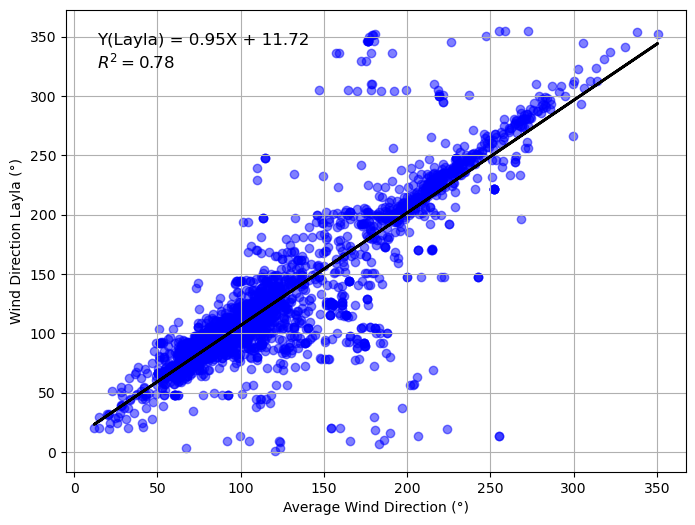

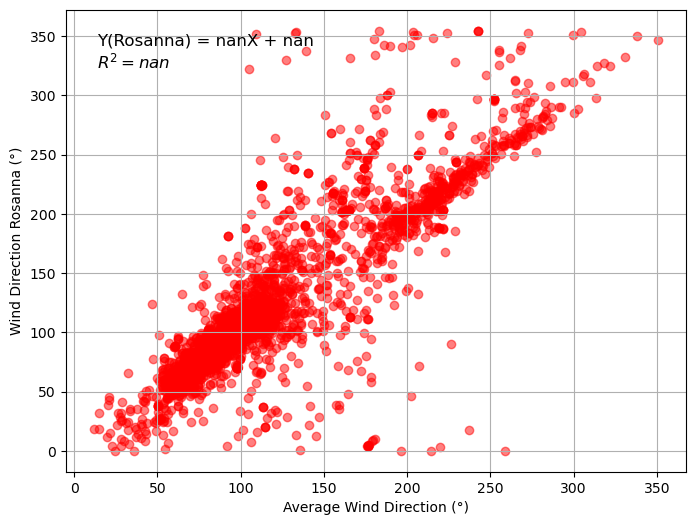

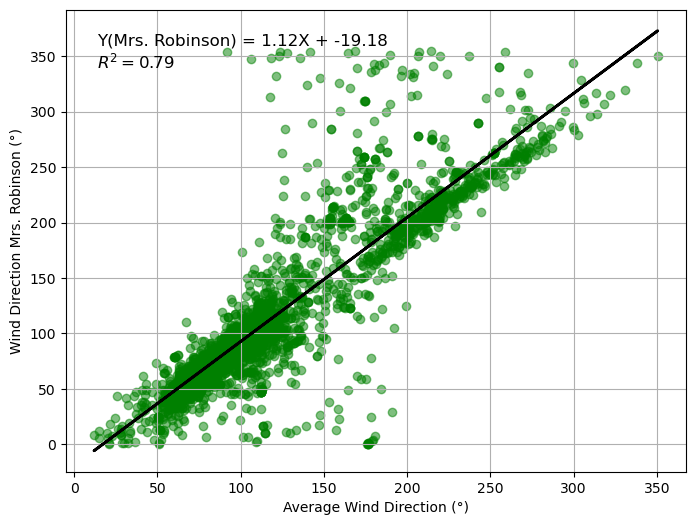

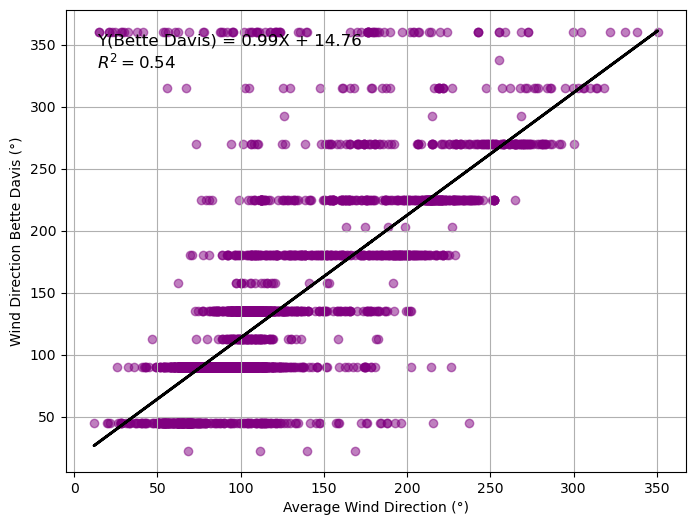

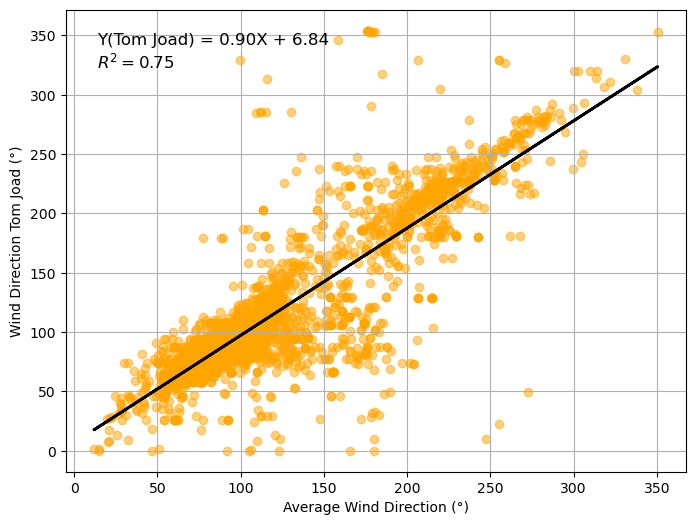

In [135]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

#----------------------------------------------------------------------------------------------------
# Layla Wind Direction
df_scatter_layla = df_layla_filtered_wind_direction[['wind_direction']].merge(df_avg_wind[['wind_direction_avg']], left_index=True, right_index=True, how='inner')

slope, intercept, r_value, p_value, std_err = linregress(df_scatter_layla['wind_direction_avg'], df_scatter_layla['wind_direction'])
regression_line = slope * df_scatter_layla['wind_direction_avg'] + intercept

plt.figure(figsize=(8, 6))
plt.scatter(df_scatter_layla['wind_direction_avg'], df_scatter_layla['wind_direction'], color='blue', alpha=0.5)
plt.plot(df_scatter_layla['wind_direction_avg'], regression_line, color='black', linewidth=2)

equation_text = f'Y(Layla) = {slope:.2f}X + {intercept:.2f}\n$R^2 = {r_value**2:.2f}$'

plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color='black')
plt.xlabel('Average Wind Direction (°)')
plt.ylabel('Wind Direction Layla (°)')
plt.grid(True)
plt.show()

#----------------------------------------------------------------------------------------------------
# # Rosanna Wind Direction
df_scatter_rosanna = df_rosanna_filtered_wind_direction[['wind_direction']].merge(df_avg_wind[['wind_direction_avg']], left_index=True, right_index=True, how='inner')

slope, intercept, r_value, p_value, std_err = linregress(df_scatter_rosanna['wind_direction_avg'], df_scatter_rosanna['wind_direction'])
regression_line = slope * df_scatter_rosanna['wind_direction_avg'] + intercept

plt.figure(figsize=(8, 6))
plt.scatter(df_scatter_rosanna['wind_direction_avg'], df_scatter_rosanna['wind_direction'], color='red', alpha=0.5)
plt.plot(df_scatter_rosanna['wind_direction_avg'], regression_line, color='black', linewidth=2)

equation_text = f'Y(Rosanna) = {slope:.2f}X + {intercept:.2f}\n$R^2 = {r_value**2:.2f}$'

plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color='black')
plt.xlabel('Average Wind Direction (°)')
plt.ylabel('Wind Direction Rosanna (°)')
plt.grid(True)
plt.show()

#----------------------------------------------------------------------------------------------------
# Mrs. Robinson Wind Direction
df_scatter_mrsrobinson = df_mrsrobinson_filtered_wind_direction[['wind_direction']].merge(df_avg_wind[['wind_direction_avg']], left_index=True, right_index=True, how='inner')

slope, intercept, r_value, p_value, std_err = linregress(df_scatter_mrsrobinson['wind_direction_avg'], df_scatter_mrsrobinson['wind_direction'])
regression_line = slope * df_scatter_mrsrobinson['wind_direction_avg'] + intercept

plt.figure(figsize=(8, 6))
plt.scatter(df_scatter_mrsrobinson['wind_direction_avg'], df_scatter_mrsrobinson['wind_direction'], color='green', alpha=0.5)
plt.plot(df_scatter_mrsrobinson['wind_direction_avg'], regression_line, color='black', linewidth=2)

equation_text = f'Y(Mrs. Robinson) = {slope:.2f}X + {intercept:.2f}\n$R^2 = {r_value**2:.2f}$'

plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color='black')
plt.xlabel('Average Wind Direction (°)')
plt.ylabel('Wind Direction Mrs. Robinson (°)')
plt.grid(True)
plt.show()

#----------------------------------------------------------------------------------------------------
# # Bette Davis Wind Direction
df_scatter_bettedavis = df_bettedavis_filtered_wind_direction[['wind_direction']].merge(df_avg_wind[['wind_direction_avg']], left_index=True, right_index=True, how='inner')

slope, intercept, r_value, p_value, std_err = linregress(df_scatter_bettedavis['wind_direction_avg'], df_scatter_bettedavis['wind_direction'])
regression_line = slope * df_scatter_bettedavis['wind_direction_avg'] + intercept

plt.figure(figsize=(8, 6))
plt.scatter(df_scatter_bettedavis['wind_direction_avg'], df_scatter_bettedavis['wind_direction'], color='purple', alpha=0.5)
plt.plot(df_scatter_bettedavis['wind_direction_avg'], regression_line, color='black', linewidth=2)

equation_text = f'Y(Bette Davis) = {slope:.2f}X + {intercept:.2f}\n$R^2 = {r_value**2:.2f}$'

plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color='black')
plt.xlabel('Average Wind Direction (°)')
plt.ylabel('Wind Direction Bette Davis (°)')
plt.grid(True)
plt.show()

#----------------------------------------------------------------------------------------------------
# Tom Joad Wind Direction
df_scatter_tomjoad = df_tomjoad_filtered_wind_direction[['wind_direction']].merge(df_avg_wind[['wind_direction_avg']], left_index=True, right_index=True, how='inner')

slope, intercept, r_value, p_value, std_err = linregress(df_scatter_tomjoad['wind_direction_avg'], df_scatter_tomjoad['wind_direction'])
regression_line = slope * df_scatter_tomjoad['wind_direction_avg'] + intercept

plt.figure(figsize=(8, 6))
plt.scatter(df_scatter_tomjoad['wind_direction_avg'], df_scatter_tomjoad['wind_direction'], color='orange', alpha=0.5)
plt.plot(df_scatter_tomjoad['wind_direction_avg'], regression_line, color='black', linewidth=2)

equation_text = f'Y(Tom Joad) = {slope:.2f}X + {intercept:.2f}\n$R^2 = {r_value**2:.2f}$'

plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color='black')
plt.xlabel('Average Wind Direction (°)')
plt.ylabel('Wind Direction Tom Joad (°)')
plt.grid(True)
plt.show()


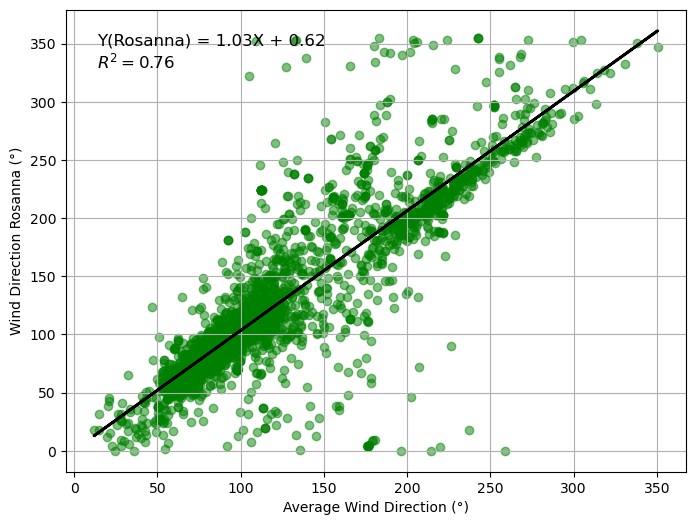

In [136]:
# Sicherstellen, dass keine NaN-Werte vorhanden sind
df_scatter_rosanna = df_scatter_rosanna.dropna(subset=['wind_direction', 'wind_direction_avg'])

# Lineare Regression durchführen
slope, intercept, r_value, p_value, std_err = linregress(df_scatter_rosanna['wind_direction_avg'], df_scatter_rosanna['wind_direction'])

# Regressionsgerade berechnen
regression_line = slope * df_scatter_rosanna['wind_direction_avg'] + intercept

# Plotten der Daten und der Regressionslinie
plt.figure(figsize=(8, 6))
plt.scatter(df_scatter_rosanna['wind_direction_avg'], df_scatter_rosanna['wind_direction'], color='green', alpha=0.5)
plt.plot(df_scatter_rosanna['wind_direction_avg'], regression_line, color='black', linewidth=2)

# Gleichung der Regressionsgeraden als Text
equation_text = f'Y(Rosanna) = {slope:.2f}X + {intercept:.2f}\n$R^2 = {r_value**2:.2f}$'

plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color='black')
plt.xlabel('Average Wind Direction (°)')
plt.ylabel('Wind Direction Rosanna (°)')
plt.grid(True)
plt.show()
